# import modules

In [2]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.default_params_ver1 import *

# from modules.functions_ver1 import *
from modules.functions_ver1_draft import *

# define functions to compare lensing and precessing

In [14]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# waveform amplitude of L, RP and NP for each sky location


def h_comparison_all(location_params: dict):
    global lens_params, RP_params, NP_params

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, key in enumerate(location_params.keys()):
        # set lensed, RP, and NP to same location
        lens_params, RP_params, NP_params = set_to_location(
            location_params[key], lens_params, RP_params, NP_params
        )

        # plot lensed waveform
        lens_inst = LensingGeo(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)

        axes[r].loglog(f_range_L, np.abs(lensed_strain), label="L")

        # plot precessing waveform
        RP_inst = Precessing(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)

        axes[r].loglog(f_range_RP, np.abs(RP_strain), label="RP")

        # plot non-precessing waveform
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)

        axes[r].loglog(f_range_NP, np.abs(NP_strain), label="NP")

        axes[r].set_xlabel("f")
        axes[r].set_ylabel(r"$|\~{h}|$")
        axes[r].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r].legend()

In [15]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# phase diff between L & RP, L & NP, RP & NP for each sky location


def phase_diff_all(location_params: dict):
    global lens_params, RP_params, NP_params

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, key in enumerate(location_params.keys()):
        # set lensed, RP, and NP to same location
        lens_params, RP_params, NP_params = set_to_location(
            location_params[key], lens_params, RP_params, NP_params
        )

        # plot lensed waveform
        lens_inst = LensingGeo(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # plot precessing waveform
        RP_inst = Precessing(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)
        phase_RP = np.unwrap(np.angle(RP_strain))

        # plot non-precessing waveform
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        phase_diff_L_RP = phase_L - phase_RP
        phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
        axes[r].plot(f_range_RP, phase_diff_L_RP, label="L & RP")

        phase_diff_L_NP = phase_L - phase_NP
        phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
        axes[r].plot(f_range_NP, phase_diff_L_NP, label="L & NP")

        phase_diff_RP_NP = phase_RP - phase_NP
        phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
        axes[r].plot(f_range_NP, phase_diff_RP_NP, label="RP & NP")

        axes[r].set_xlabel("f")
        axes[r].set_ylabel(r"$\Delta \Phi$")
        axes[r].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r].legend()

In [16]:
# plot h_comparison_all and phase_diff_all side by side

lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)


def h_phase_diff_all(
    location_params: dict, lens_Class=LensingGeo, prec_Class=Precessing
):
    global lens_params, RP_params, NP_params

    nrows = len(location_params)
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 4 * nrows))
    # reshape axes to 2D if it's 1D
    if axes.ndim == 1:
        axes = axes.reshape(1, -1)

    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, key in enumerate(location_params.keys()):
        # set lensed, RP, and NP to same location
        lens_params, RP_params, NP_params = set_to_location(
            location_params[key], lens_params, RP_params, NP_params
        )

        # lensed waveform
        lens_inst = lens_Class(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # RP waveform
        RP_inst = prec_Class(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)
        phase_RP = np.unwrap(np.angle(RP_strain))

        # NP waveform
        NP_inst = prec_Class(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        # set plot colors based on sky location
        colors = {"faceon": "#1f77b4", "edgeon": "#ff7f0e", "random": "#2ca02c"}

        # left column: h_comparison_all
        axes[r, 0].loglog(
            f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[key]
        )
        axes[r, 0].loglog(
            f_range_RP, np.abs(RP_strain), label="RP", ls="--", c=colors[key]
        )
        axes[r, 0].loglog(
            f_range_NP, np.abs(NP_strain), label="NP", ls=":", c=colors[key]
        )
        axes[r, 0].set_xlabel("f")
        axes[r, 0].set_ylabel(r"$|\~{h}|$")
        axes[r, 0].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r, 0].legend()

        # right column: phase_diff_all
        phase_diff_L_RP = phase_L - phase_RP
        phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
        axes[r, 1].plot(
            f_range_RP, phase_diff_L_RP, label="L & RP", ls="-", c=colors[key]
        )

        phase_diff_L_NP = phase_L - phase_NP
        phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_L_NP, label="L & NP", ls="--", c=colors[key]
        )

        phase_diff_RP_NP = phase_RP - phase_NP
        phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_RP_NP, label="RP & NP", ls=":", c=colors[key]
        )

        axes[r, 1].set_xlabel("f")
        axes[r, 1].set_ylabel(r"$\Delta \Phi$")
        axes[r, 1].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r, 1].legend()

In [17]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)


def slider_h_phase_diff_all(
    location_params,
    mcz,
    theta_tilde,
    param_name,
    param_unit,
    param,
    param_label,
    lens_Class=LensingGeo,
    prec_Class=Precessing,
):
    global lens_params, RP_params, NP_params

    lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    RP_params["theta_tilde"] = theta_tilde
    RP_params[param_name] = param * param_unit

    h_phase_diff_all(location_params, lens_Class, prec_Class)

    # add a big title above the figure
    plt.suptitle(
        r"{} = {:.3g}, {} = {:.3g}".format(
            r"$\tilde{\theta}$", RP_params["theta_tilde"], param_label, param
        ),
        fontsize=16,
        y=1.05,
    )

# plot lensing and precessing comparisons

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:386: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


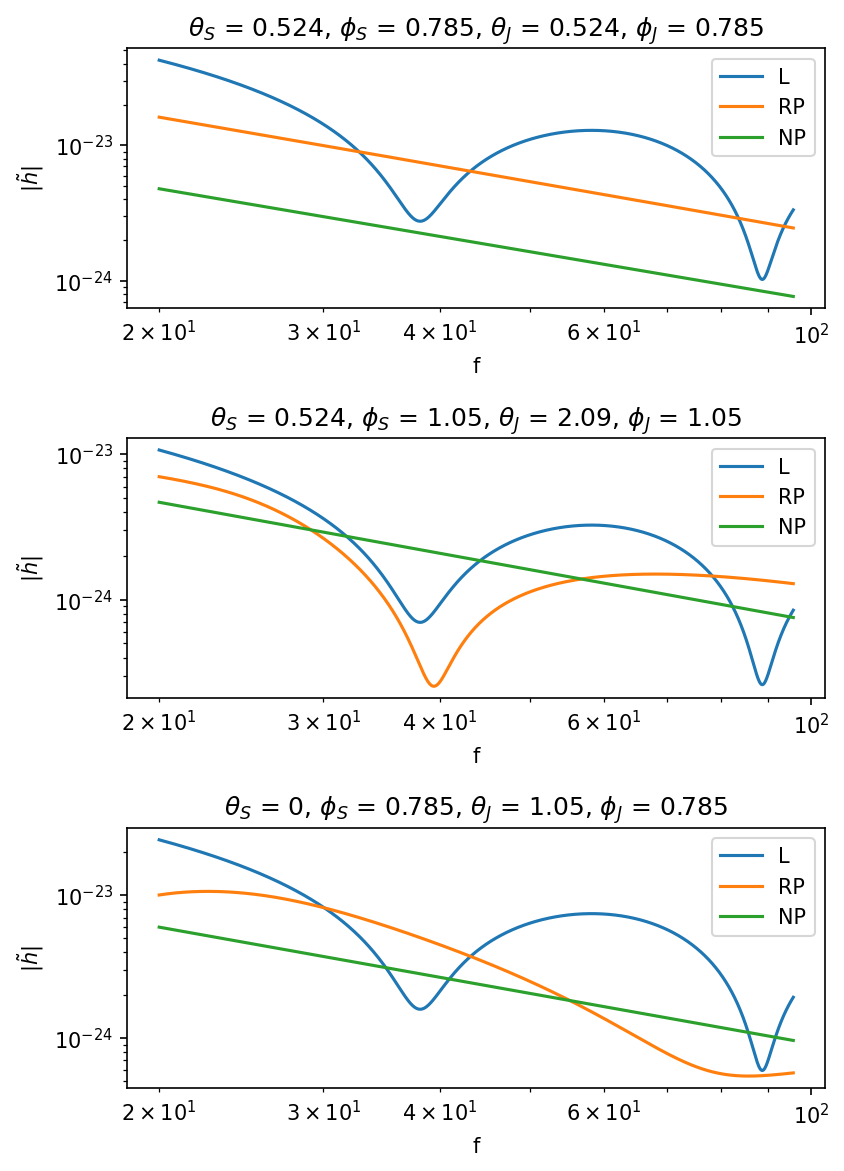

In [6]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 20
MLz = 2000
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
h_comparison_all(loc_params["sys1"])

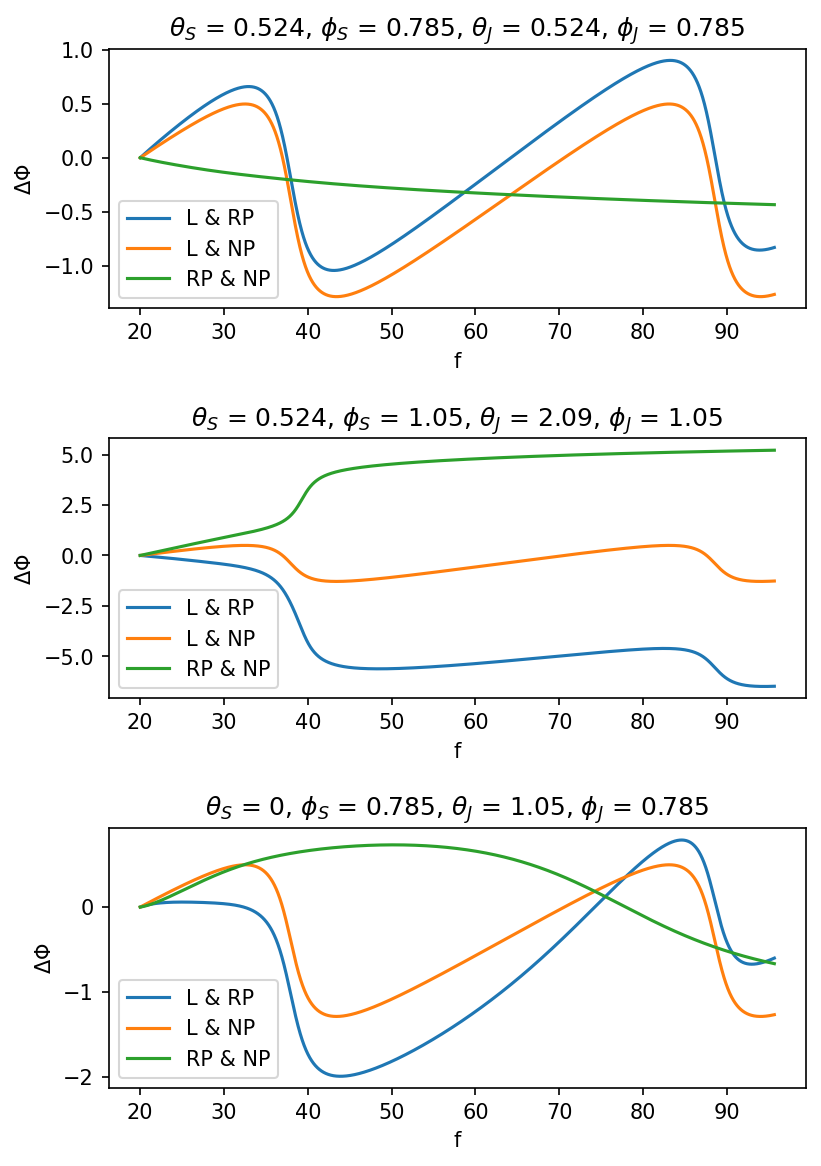

In [7]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 20
MLz = 2000
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
phase_diff_all(loc_params["sys1"])

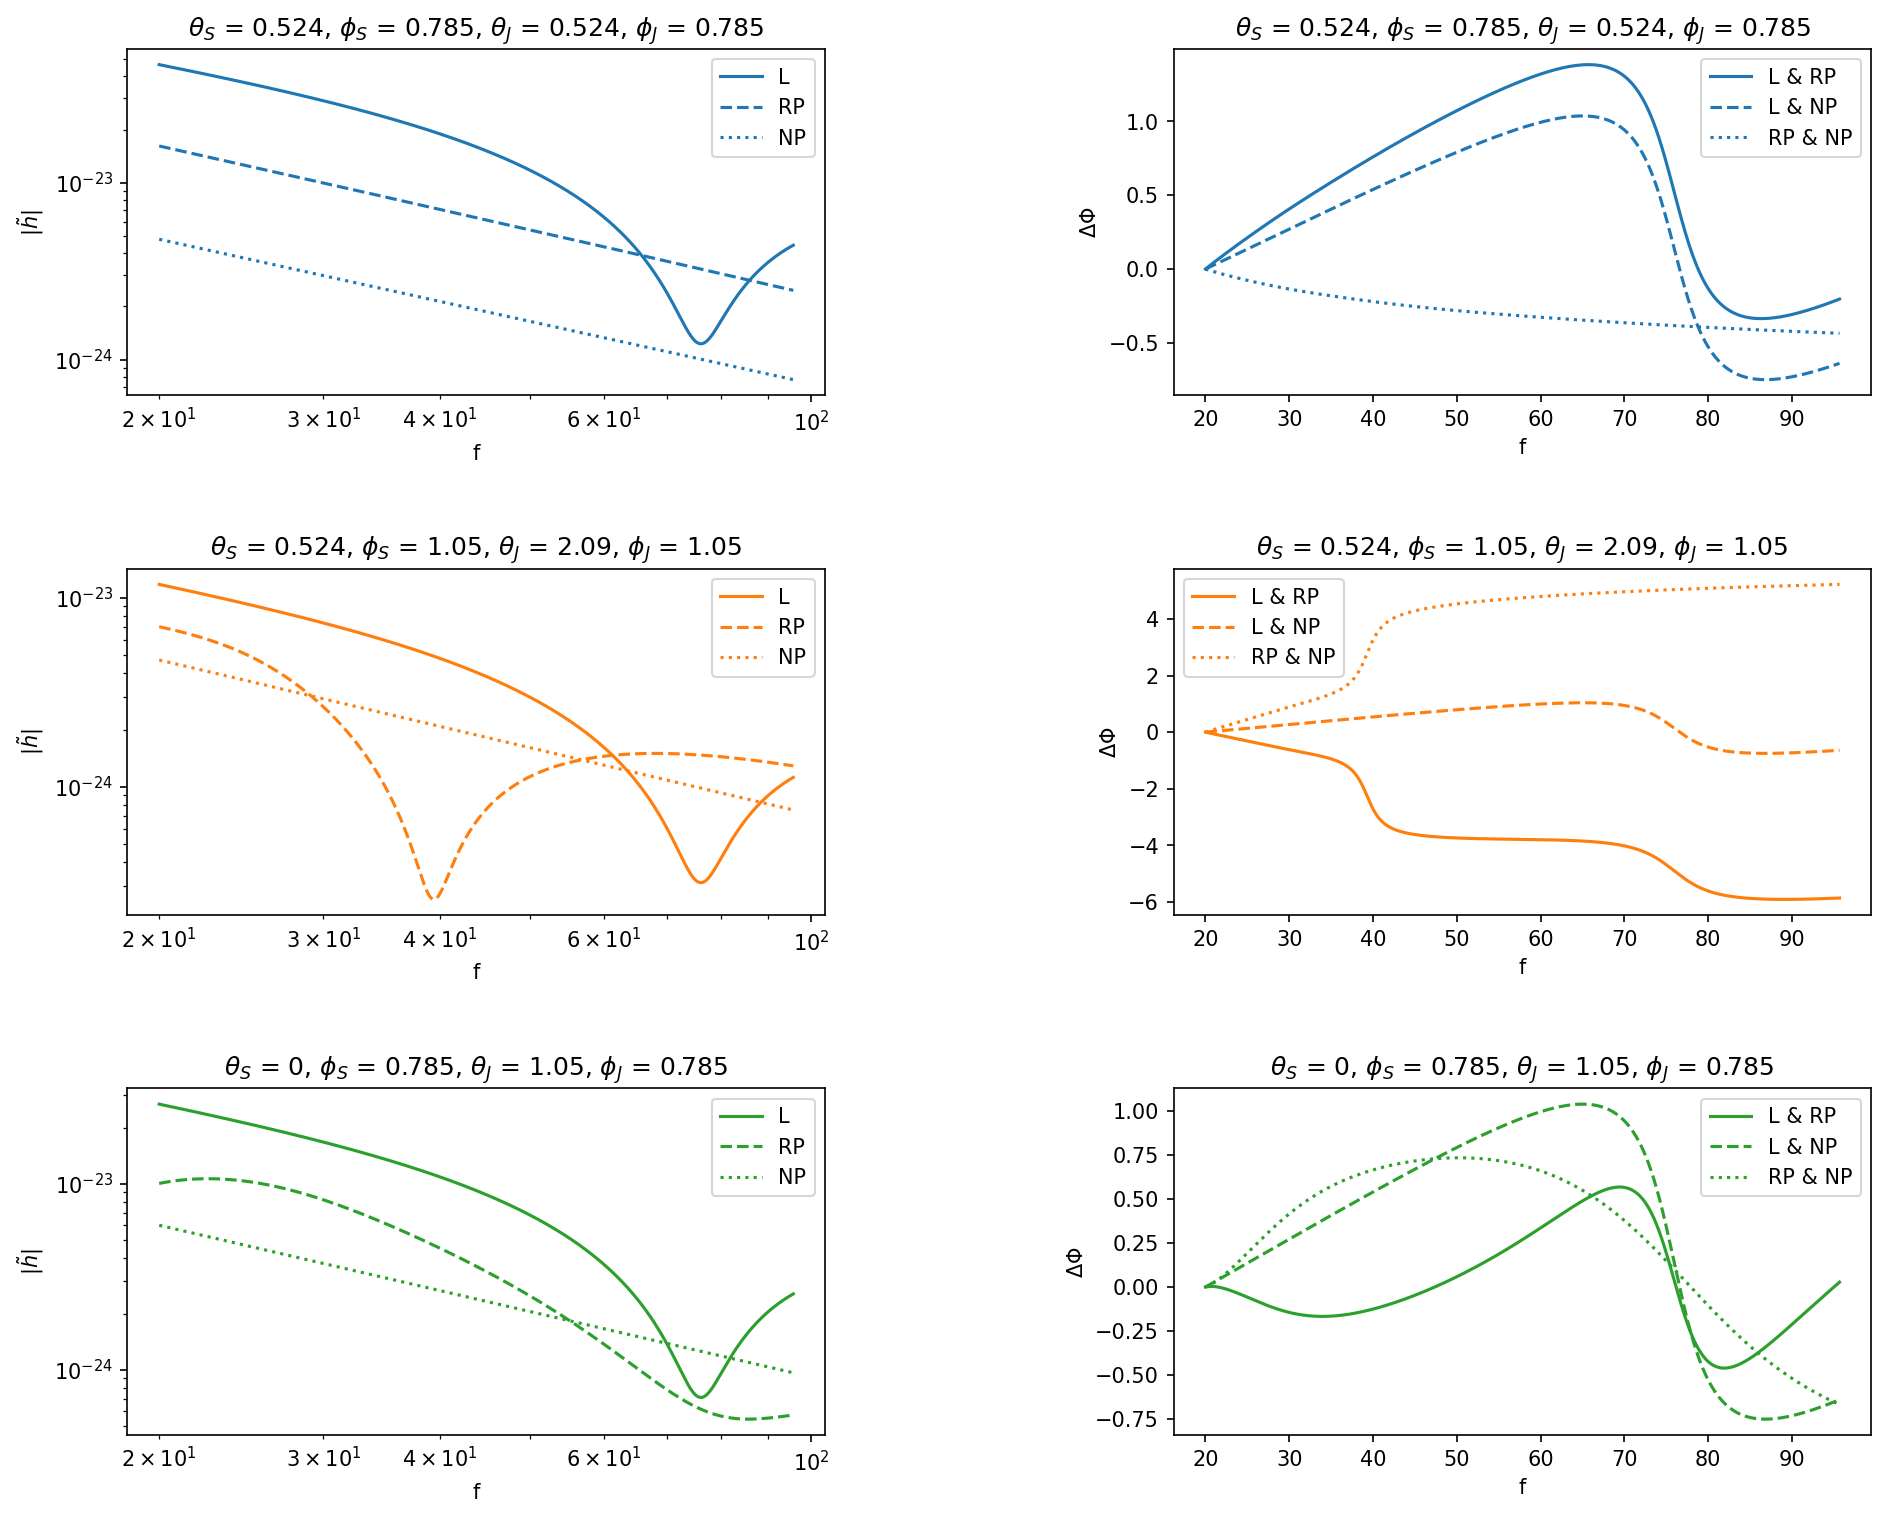

In [8]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 20
MLz = 1000
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(loc_params["sys1"])

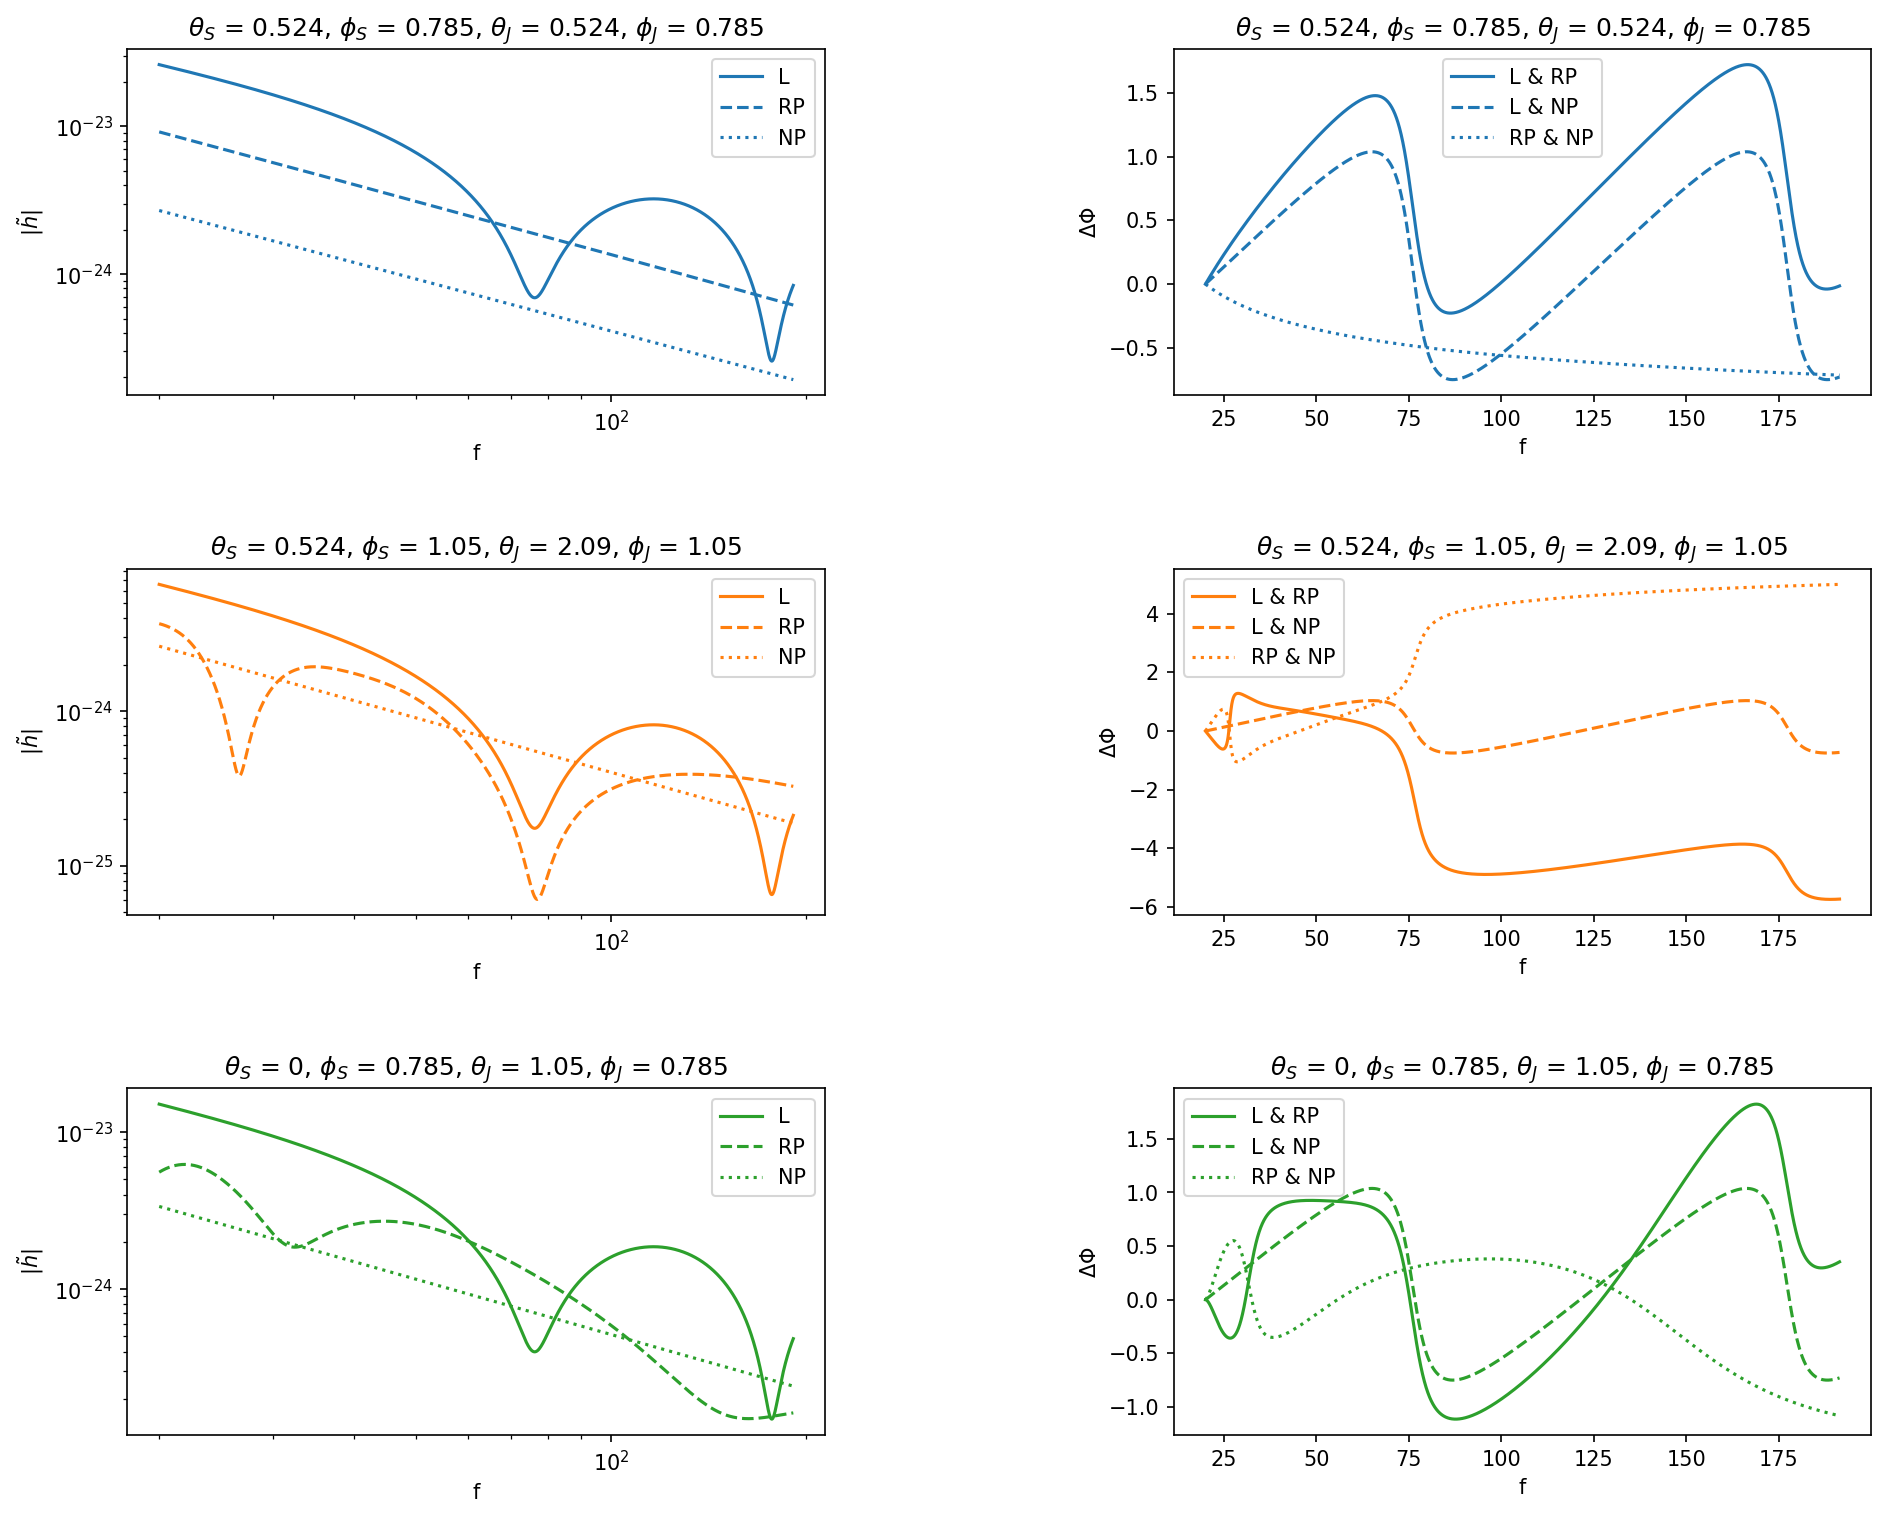

In [9]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 10
MLz = 1000
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(loc_params["sys1"])

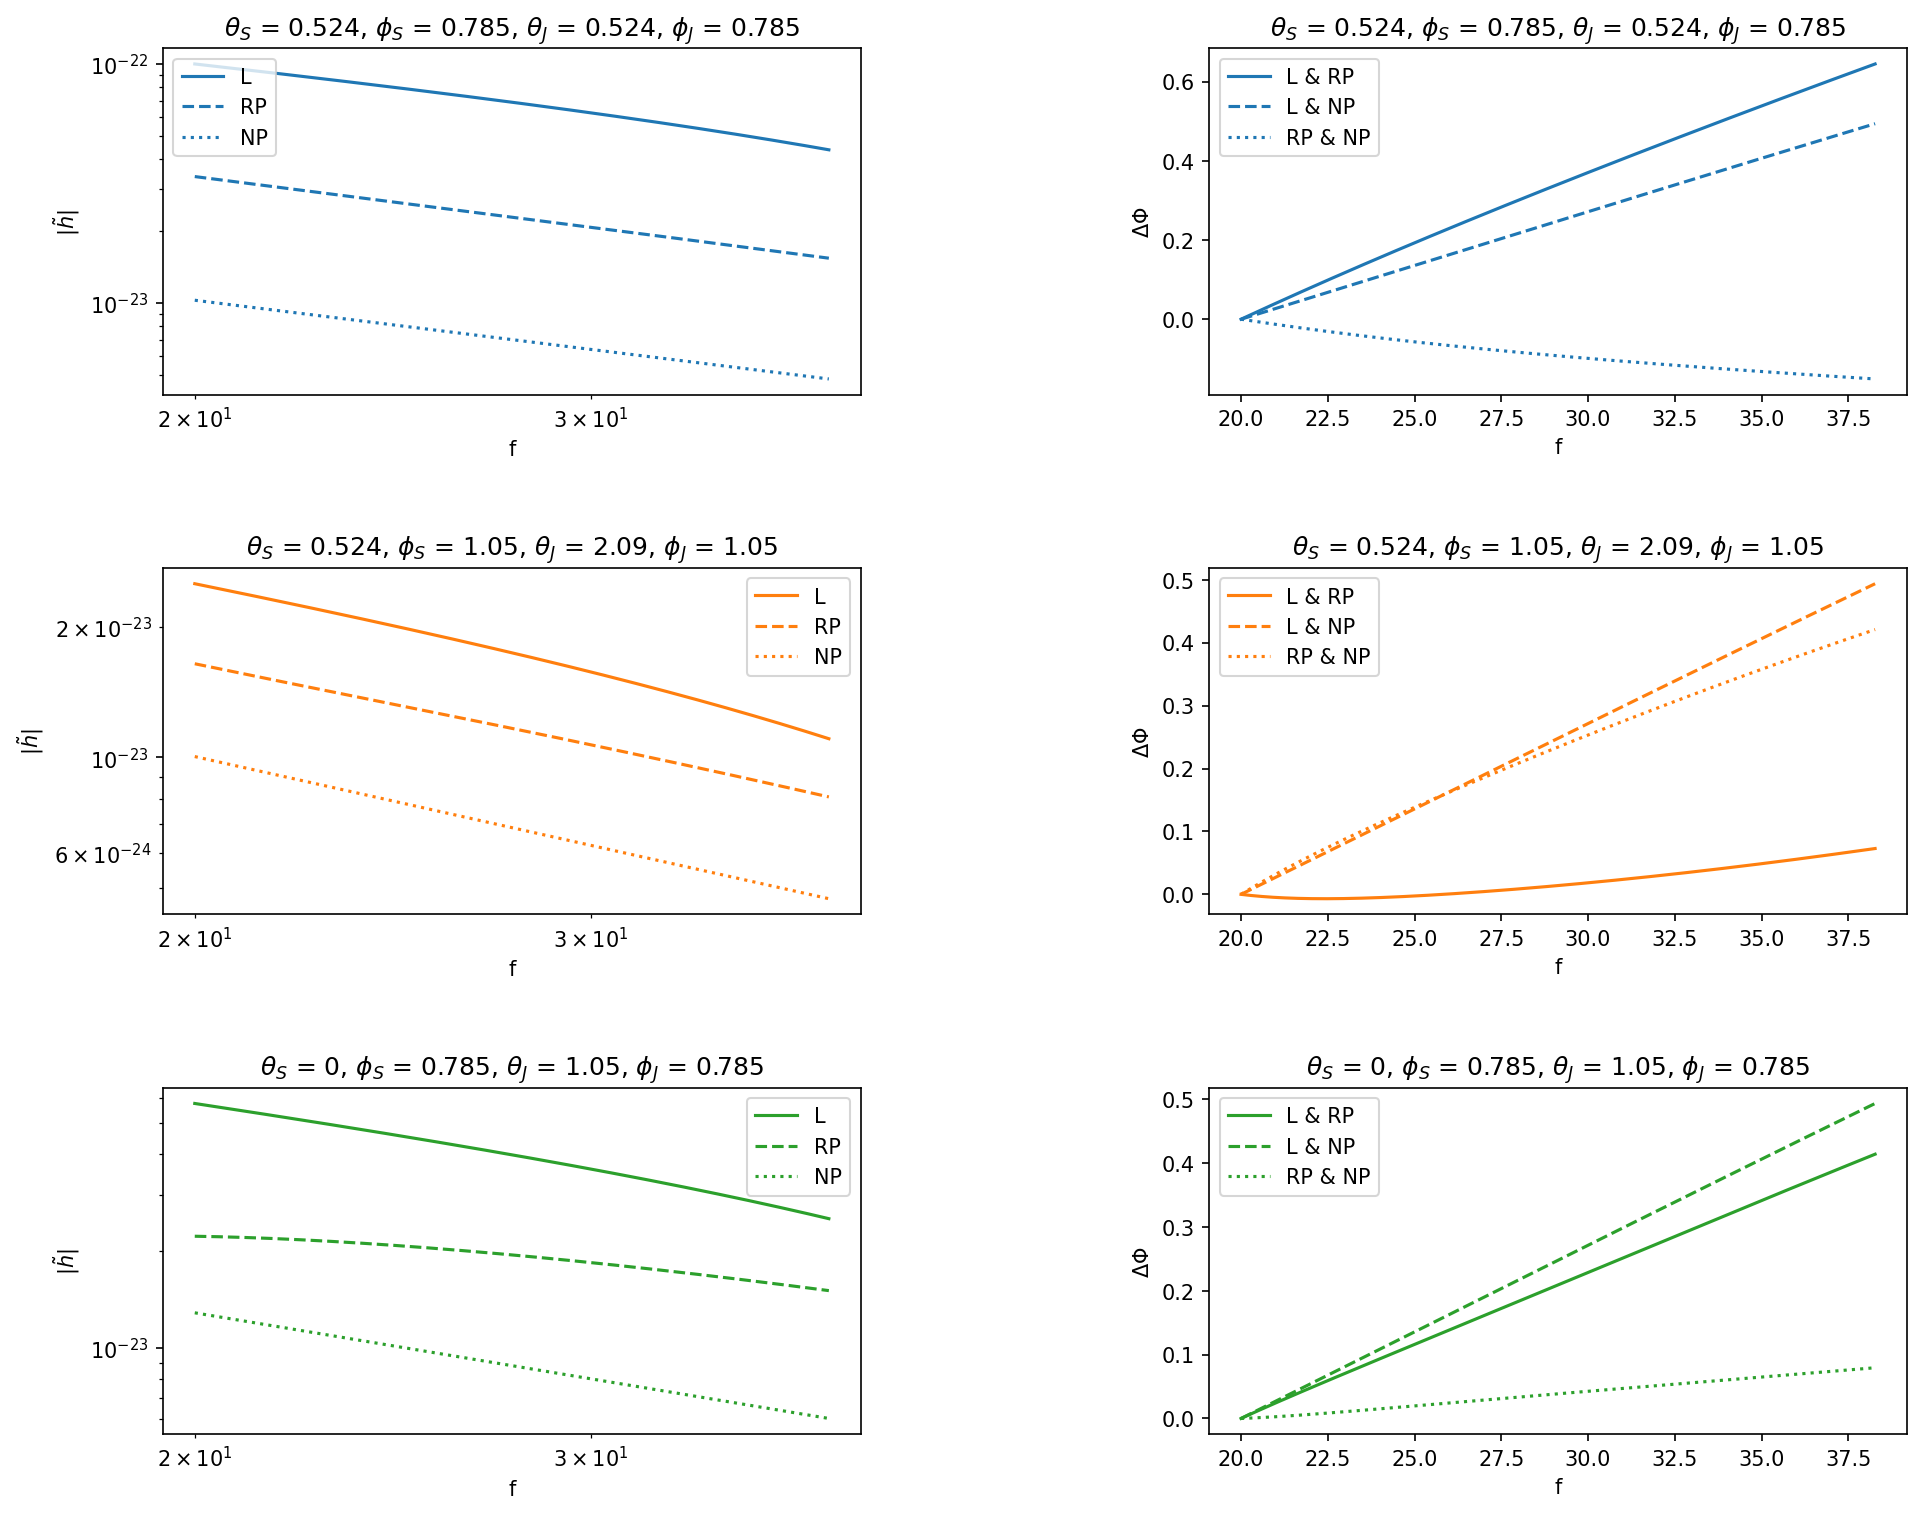

In [10]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# set custom values for mcz and MLz
mcz = 50
MLz = 1000
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# using Saif's choice of sky locations
h_phase_diff_all(loc_params["sys1"])

# face-on near $\~\theta$ = 0

In [19]:
key = "faceon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

Omega_tilde_slider = widgets.FloatSlider(
    min=0, max=3, step=0.1, value=1.5, description=r"$\tilde{\Omega}$"
)
theta_tilde_slider = widgets.FloatSlider(
    min=0, max=0.2, step=0.01, value=0.1, description=r"$\tilde{\theta}$"
)

interact(
    slider_h_phase_diff_all,
    mcz=fixed(40),
    theta_tilde=theta_tilde_slider,
    location_params=fixed(indiv_loc_dict),
    param_name=fixed("omega_tilde"),
    param_unit=fixed(1),
    param=Omega_tilde_slider,
    param_label=fixed(r"$\tilde{\Omega}$"),
    lens_Class=fixed(LensingGeo),
    prec_Class=fixed(Precessing),
)

interactive(children=(FloatSlider(value=0.1, description='$\\tilde{\\theta}$', max=0.2, step=0.01), FloatSlide…

<function __main__.slider_h_phase_diff_all(location_params, mcz, theta_tilde, param_name, param_unit, param, param_label, lens_Class=<class 'scripts.Classes_ver1.LensingGeo'>, prec_Class=<class 'scripts.Classes_ver1.Precessing'>)>

# plot optimized mismatch over $\gamma_P$

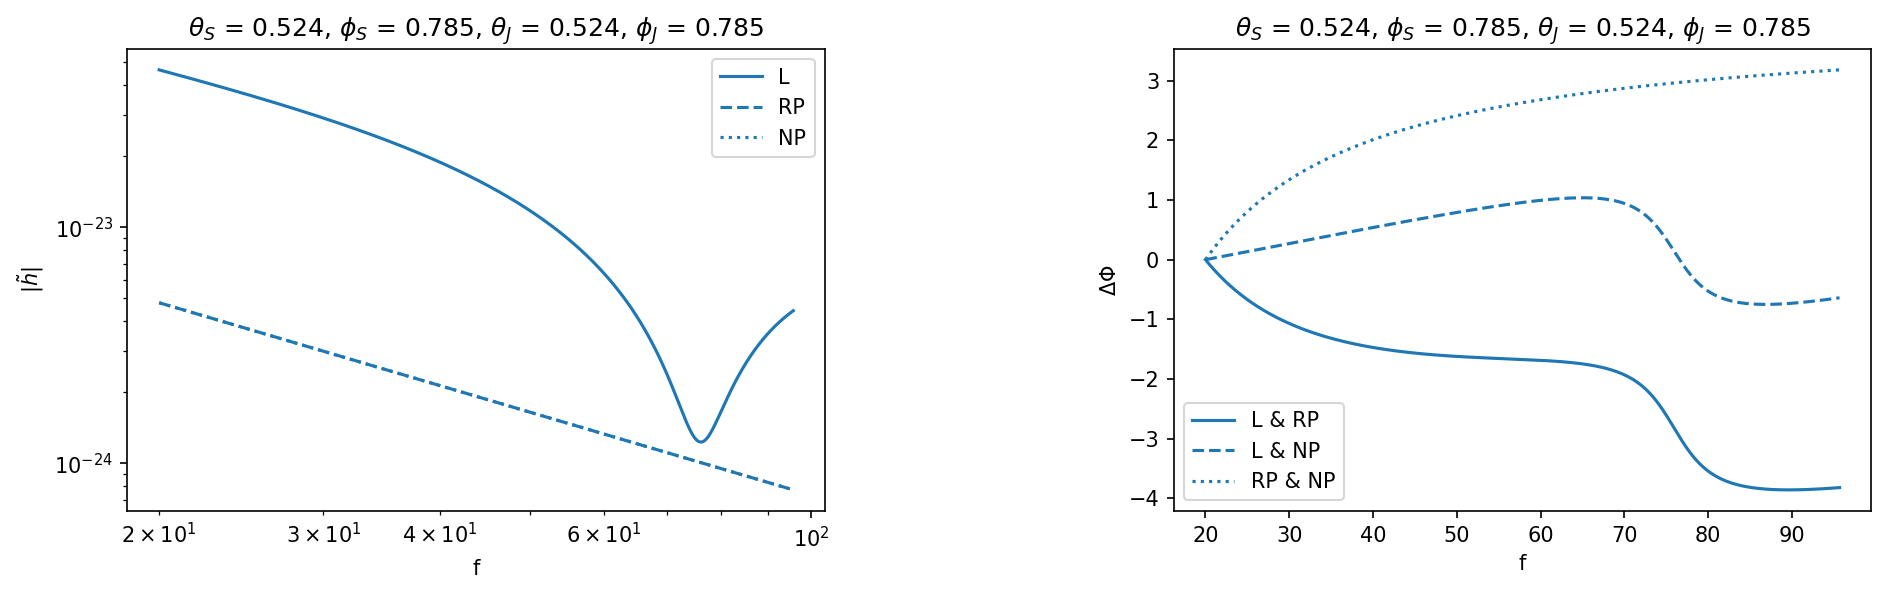

In [12]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "faceon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.316
RP_params["theta_tilde"] = 0.0
RP_params["gamma_P"] = 0.0

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

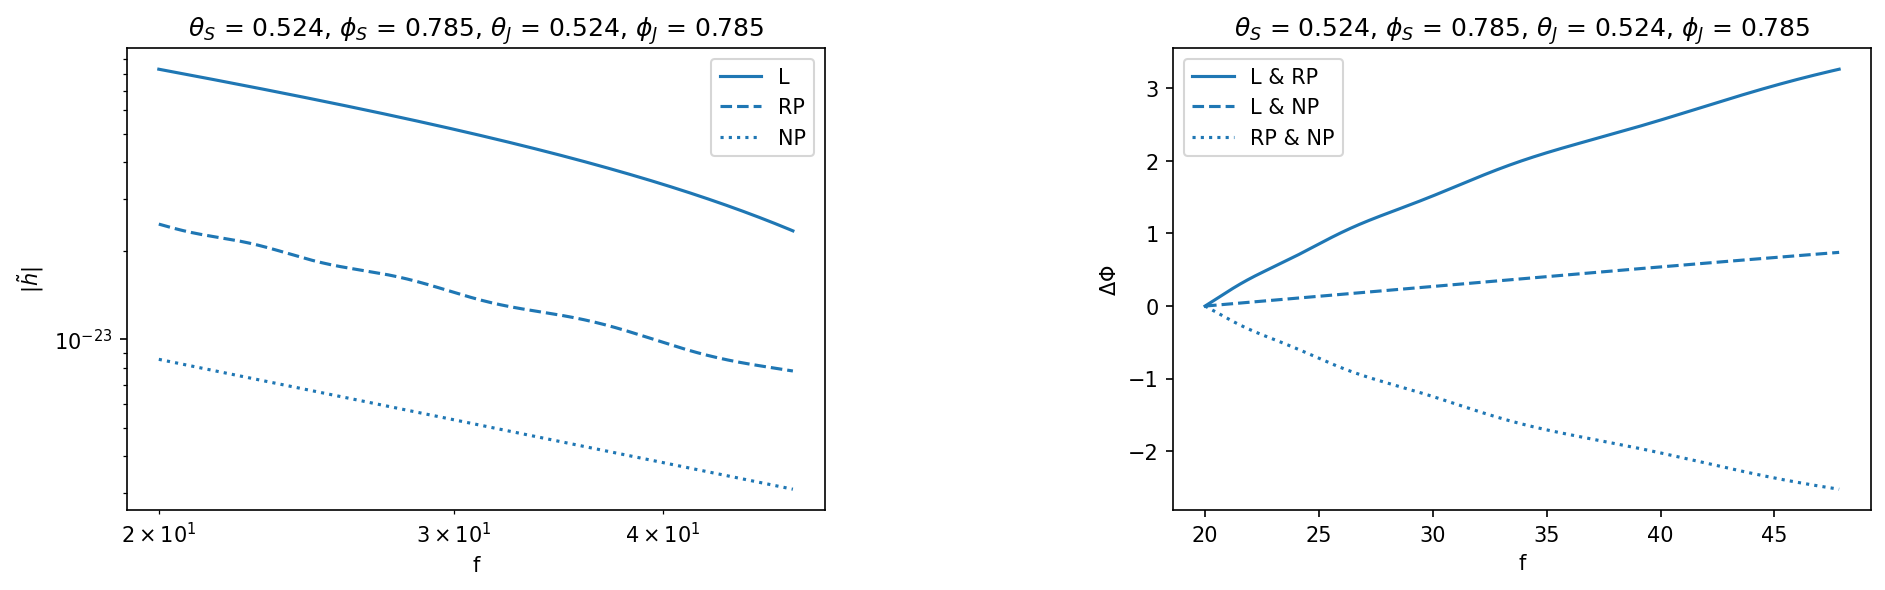

In [11]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "faceon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 3.0
RP_params["theta_tilde"] = 8.0
RP_params["gamma_P"] = 2.79

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:386: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


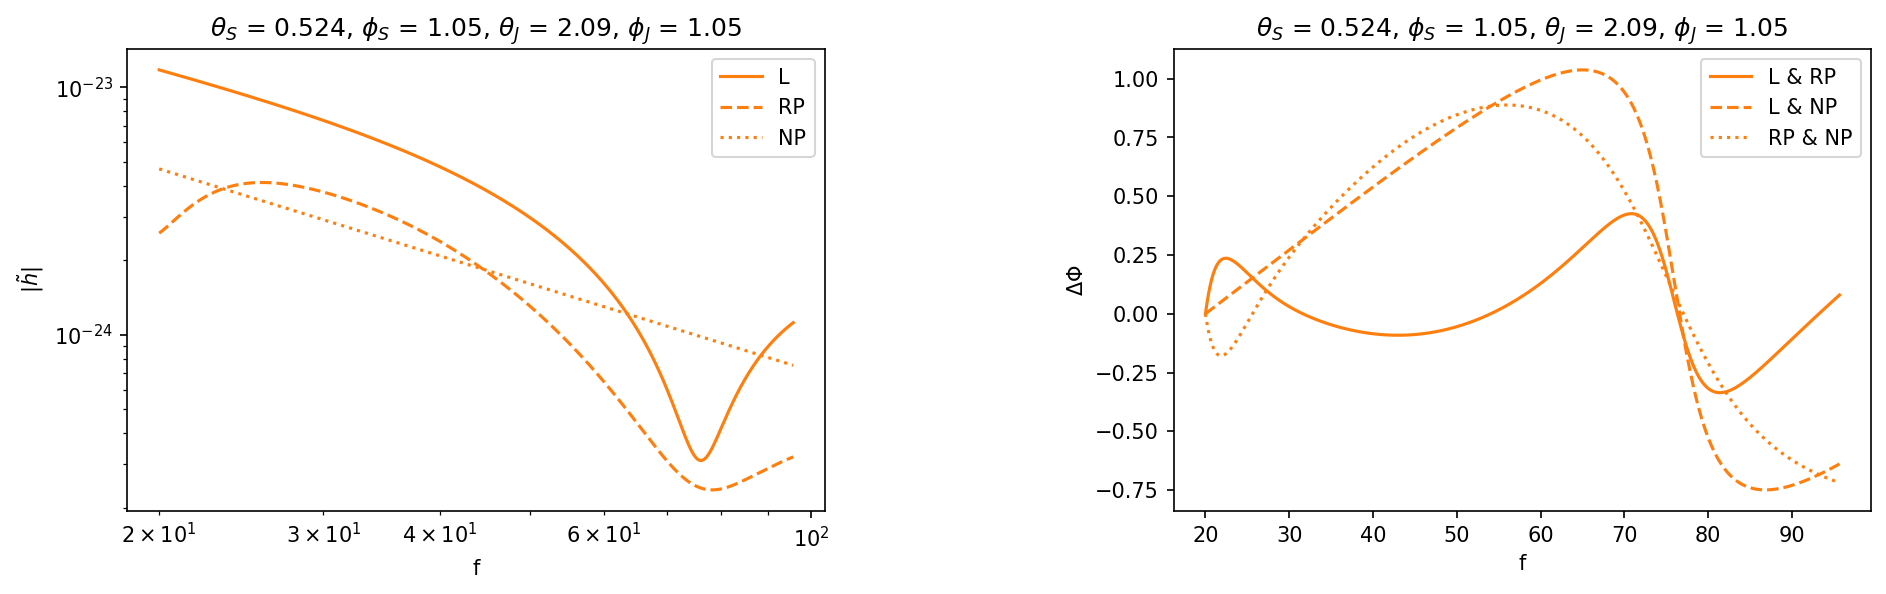

In [13]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "edgeon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.26
RP_params["theta_tilde"] = 2.11
RP_params["gamma_P"] = 3.55

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

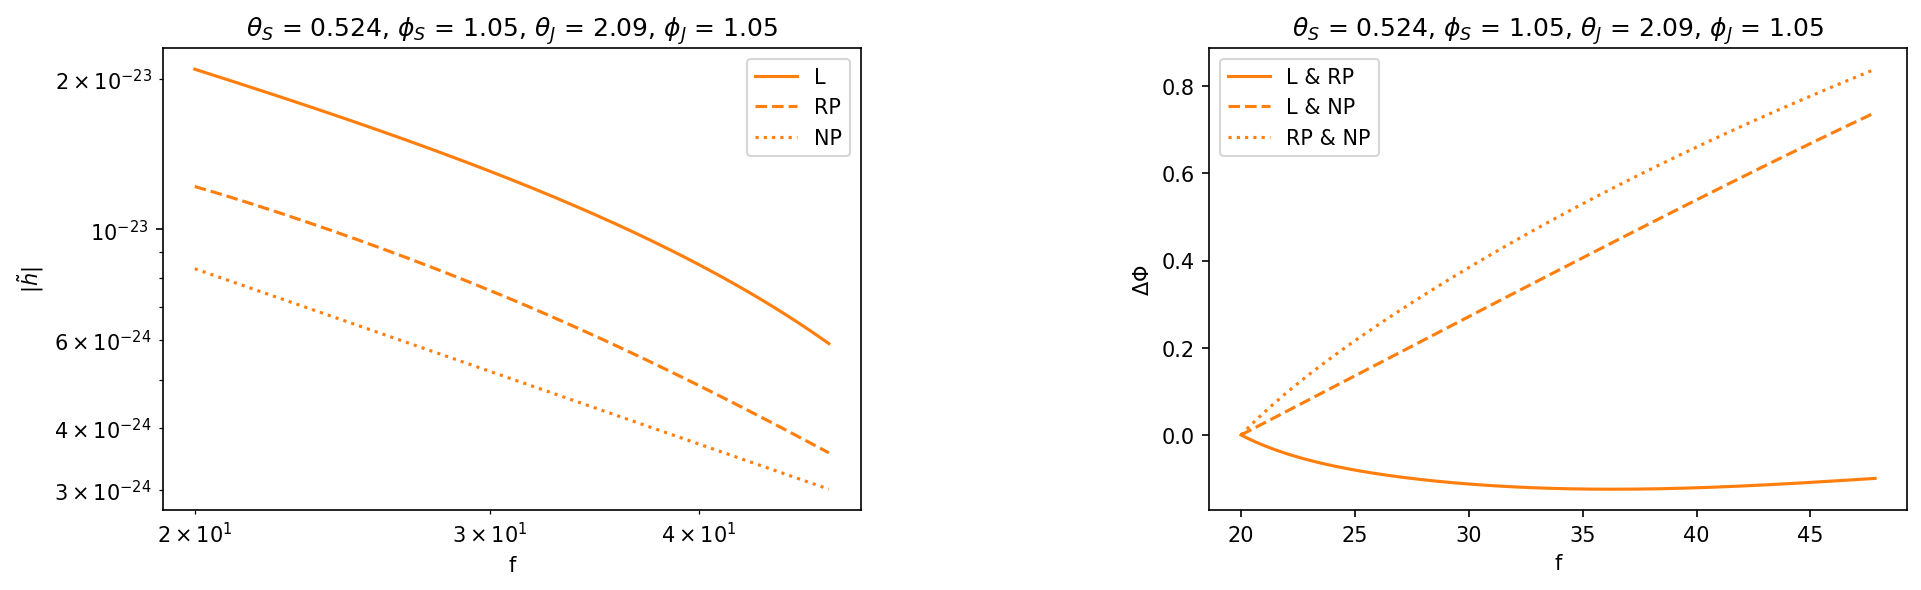

In [14]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "edgeon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.11
RP_params["theta_tilde"] = 2.95
RP_params["gamma_P"] = 6.03

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

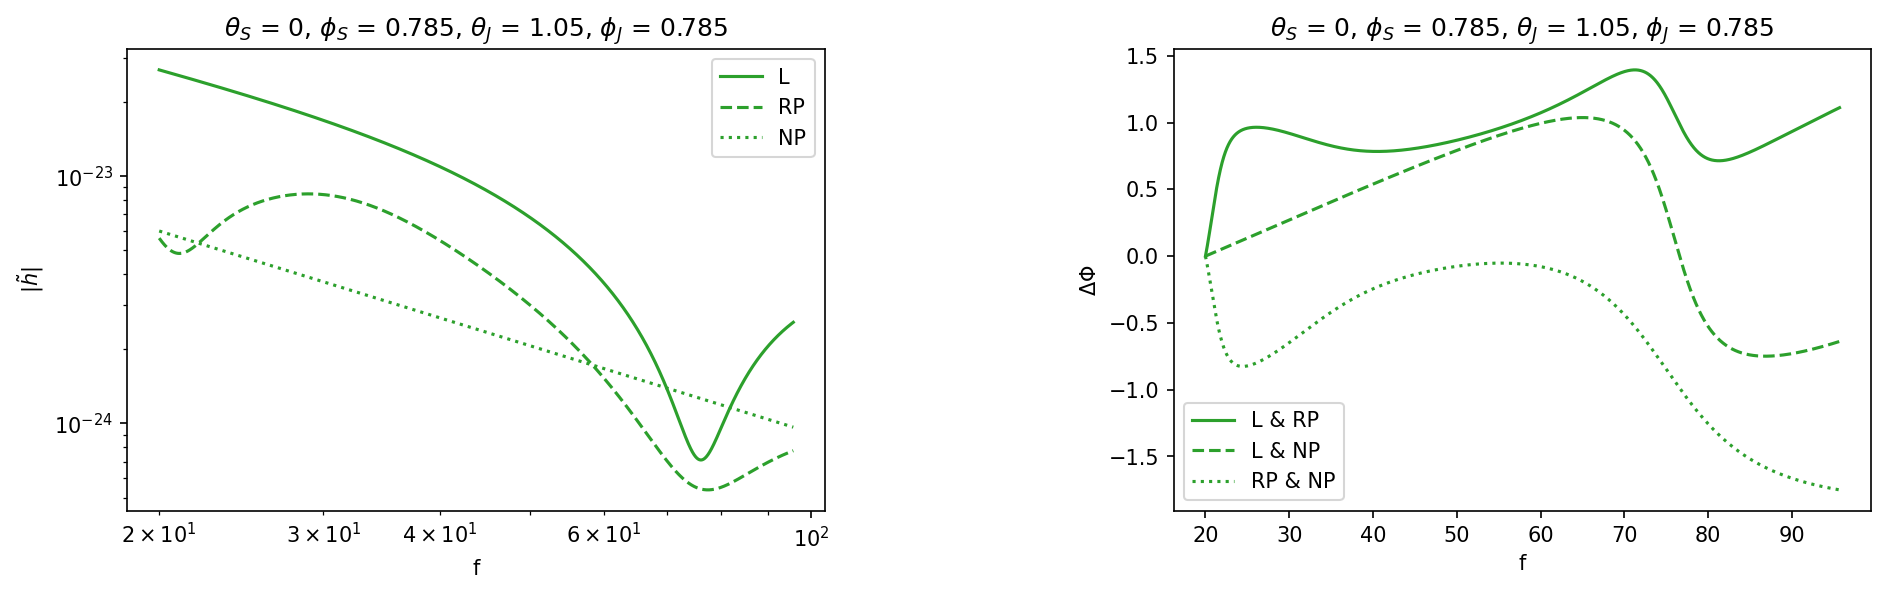

In [15]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.42
RP_params["theta_tilde"] = 4.21
RP_params["gamma_P"] = 4.38

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

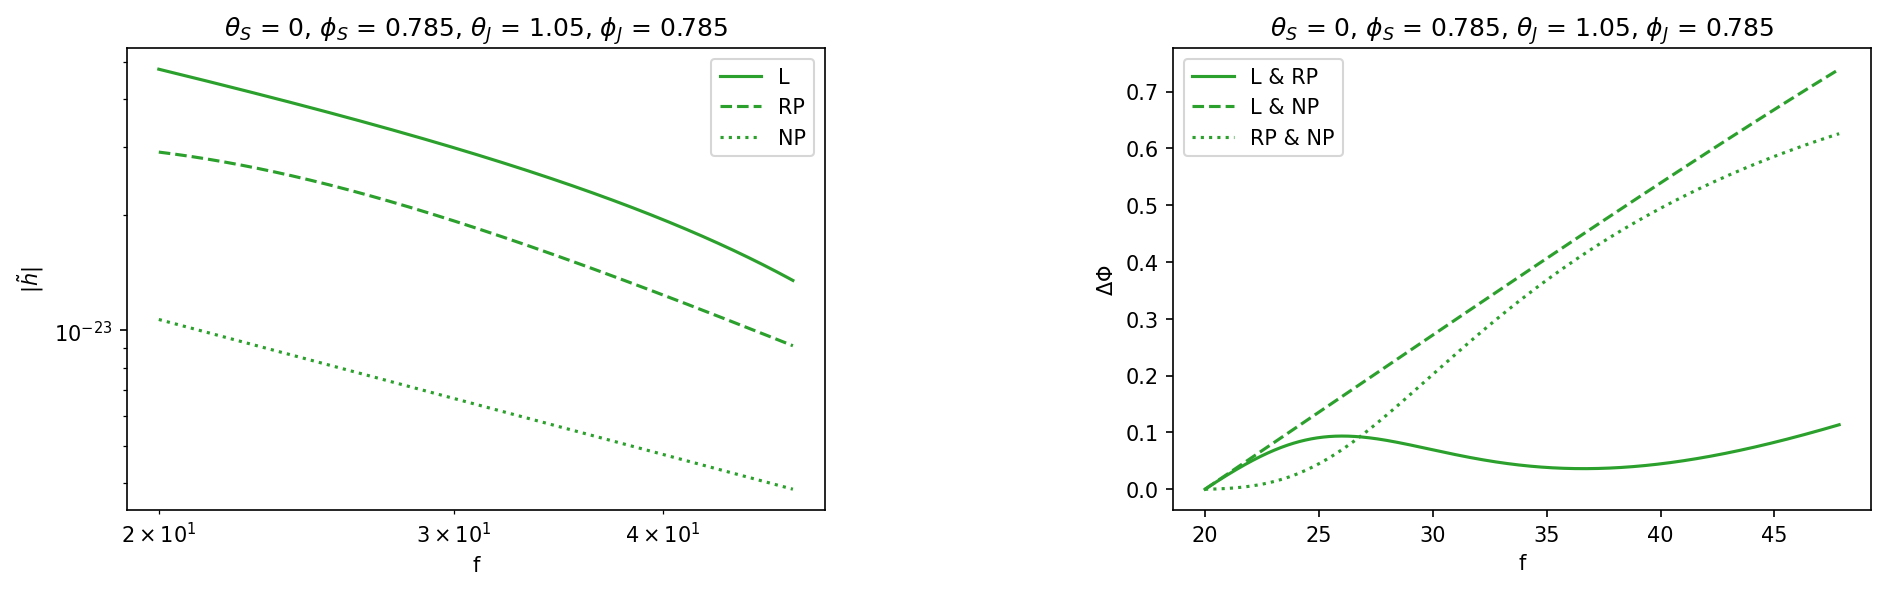

In [16]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.789
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 1.08

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

# plot optimized mismatch over $\gamma_P$ for L & RP and RP & NP

In [10]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)


def h_phase_diff_pairs(lens_Class=LensingGeo, prec_Class=Precessing):
    global lens_params, RP_params, NP_params

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 4 * 3))

    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, cmd in enumerate(["L & RP", "L & NP", "RP & NP"]):
        # lensed waveform
        lens_inst = lens_Class(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # NP waveform
        NP_inst = prec_Class(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        # set plot colors based on sky location
        colors = {"L & RP": "#1f77b4", "L & NP": "#ff7f0e", "RP & NP": "#2ca02c"}

        if cmd == "L & RP":
            mismatch_results = optimize_mismatch_gammaP(
                cmd, lens_params, RP_params, NP_params
            )
            print(cmd, mismatch_results)

            # RP waveform
            RP_params["gamma_P"] = mismatch_results["g_min"]
            RP_inst = prec_Class(RP_params)
            f_cut_RP = RP_inst.f_cut()
            f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
            RP_strain = RP_inst.strain(f_range_RP)
            phase_RP = np.unwrap(np.angle(RP_strain))

            # plotting
            axes[r, 0].loglog(
                f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[cmd]
            )
            axes[r, 0].loglog(
                f_range_RP, np.abs(RP_strain), label="RP", ls="--", c=colors[cmd]
            )
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_L_RP = phase_L - phase_RP
            phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
            axes[r, 1].plot(
                f_range_RP, phase_diff_L_RP, label="L & RP", ls="-", c=colors[cmd]
            )
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()

        elif cmd == "L & NP":
            mismatch_results = optimize_mismatch_gammaP(
                cmd, lens_params, RP_params, NP_params
            )
            print(cmd, mismatch_results)

            # plotting
            axes[r, 0].loglog(
                f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[cmd]
            )
            axes[r, 0].loglog(
                f_range_NP, np.abs(NP_strain), label="NP", ls="--", c=colors[cmd]
            )
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_L_NP = phase_L - phase_NP
            phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
            axes[r, 1].plot(
                f_range_NP, phase_diff_L_NP, label="L & NP", ls="-", c=colors[cmd]
            )
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()

        elif cmd == "RP & NP":
            mismatch_results = optimize_mismatch_gammaP(
                cmd, lens_params, RP_params, NP_params
            )
            print(cmd, mismatch_results)

            # RP waveform
            RP_params["gamma_P"] = mismatch_results["g_min"]
            RP_inst = prec_Class(RP_params)
            f_cut_RP = RP_inst.f_cut()
            f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
            RP_strain = RP_inst.strain(f_range_RP)
            phase_RP = np.unwrap(np.angle(RP_strain))

            # plotting
            axes[r, 0].loglog(
                f_range_RP, np.abs(RP_strain), label="RP", ls="-", c=colors[cmd]
            )
            axes[r, 0].loglog(
                f_range_NP, np.abs(NP_strain), label="NP", ls="--", c=colors[cmd]
            )
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_RP_NP = phase_RP - phase_NP
            phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
            axes[r, 1].plot(
                f_range_NP, phase_diff_RP_NP, label="RP & NP", ls="-", c=colors[cmd]
            )
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()

    plt.suptitle(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
        ),
        fontsize=16,
        y=1.05,
    )

L & RP {'ep_min': 0.1806021129657901, 'g_min': 0.0, 'ep_max': 0.1806021129657901, 'g_max': 0.0, 'ep_0': 0.1806021129657901}
L & NP {'ep_min': 0.274897389021169, 'g_min': 0.0, 'ep_max': 0.274897389021169, 'g_max': 0.0, 'ep_0': 0.274897389021169}
RP & NP {'ep_min': 0.06194370299900298, 'g_min': 0.0, 'ep_max': 0.06194370299900298, 'g_max': 0.0, 'ep_0': 0.06194370299900298}


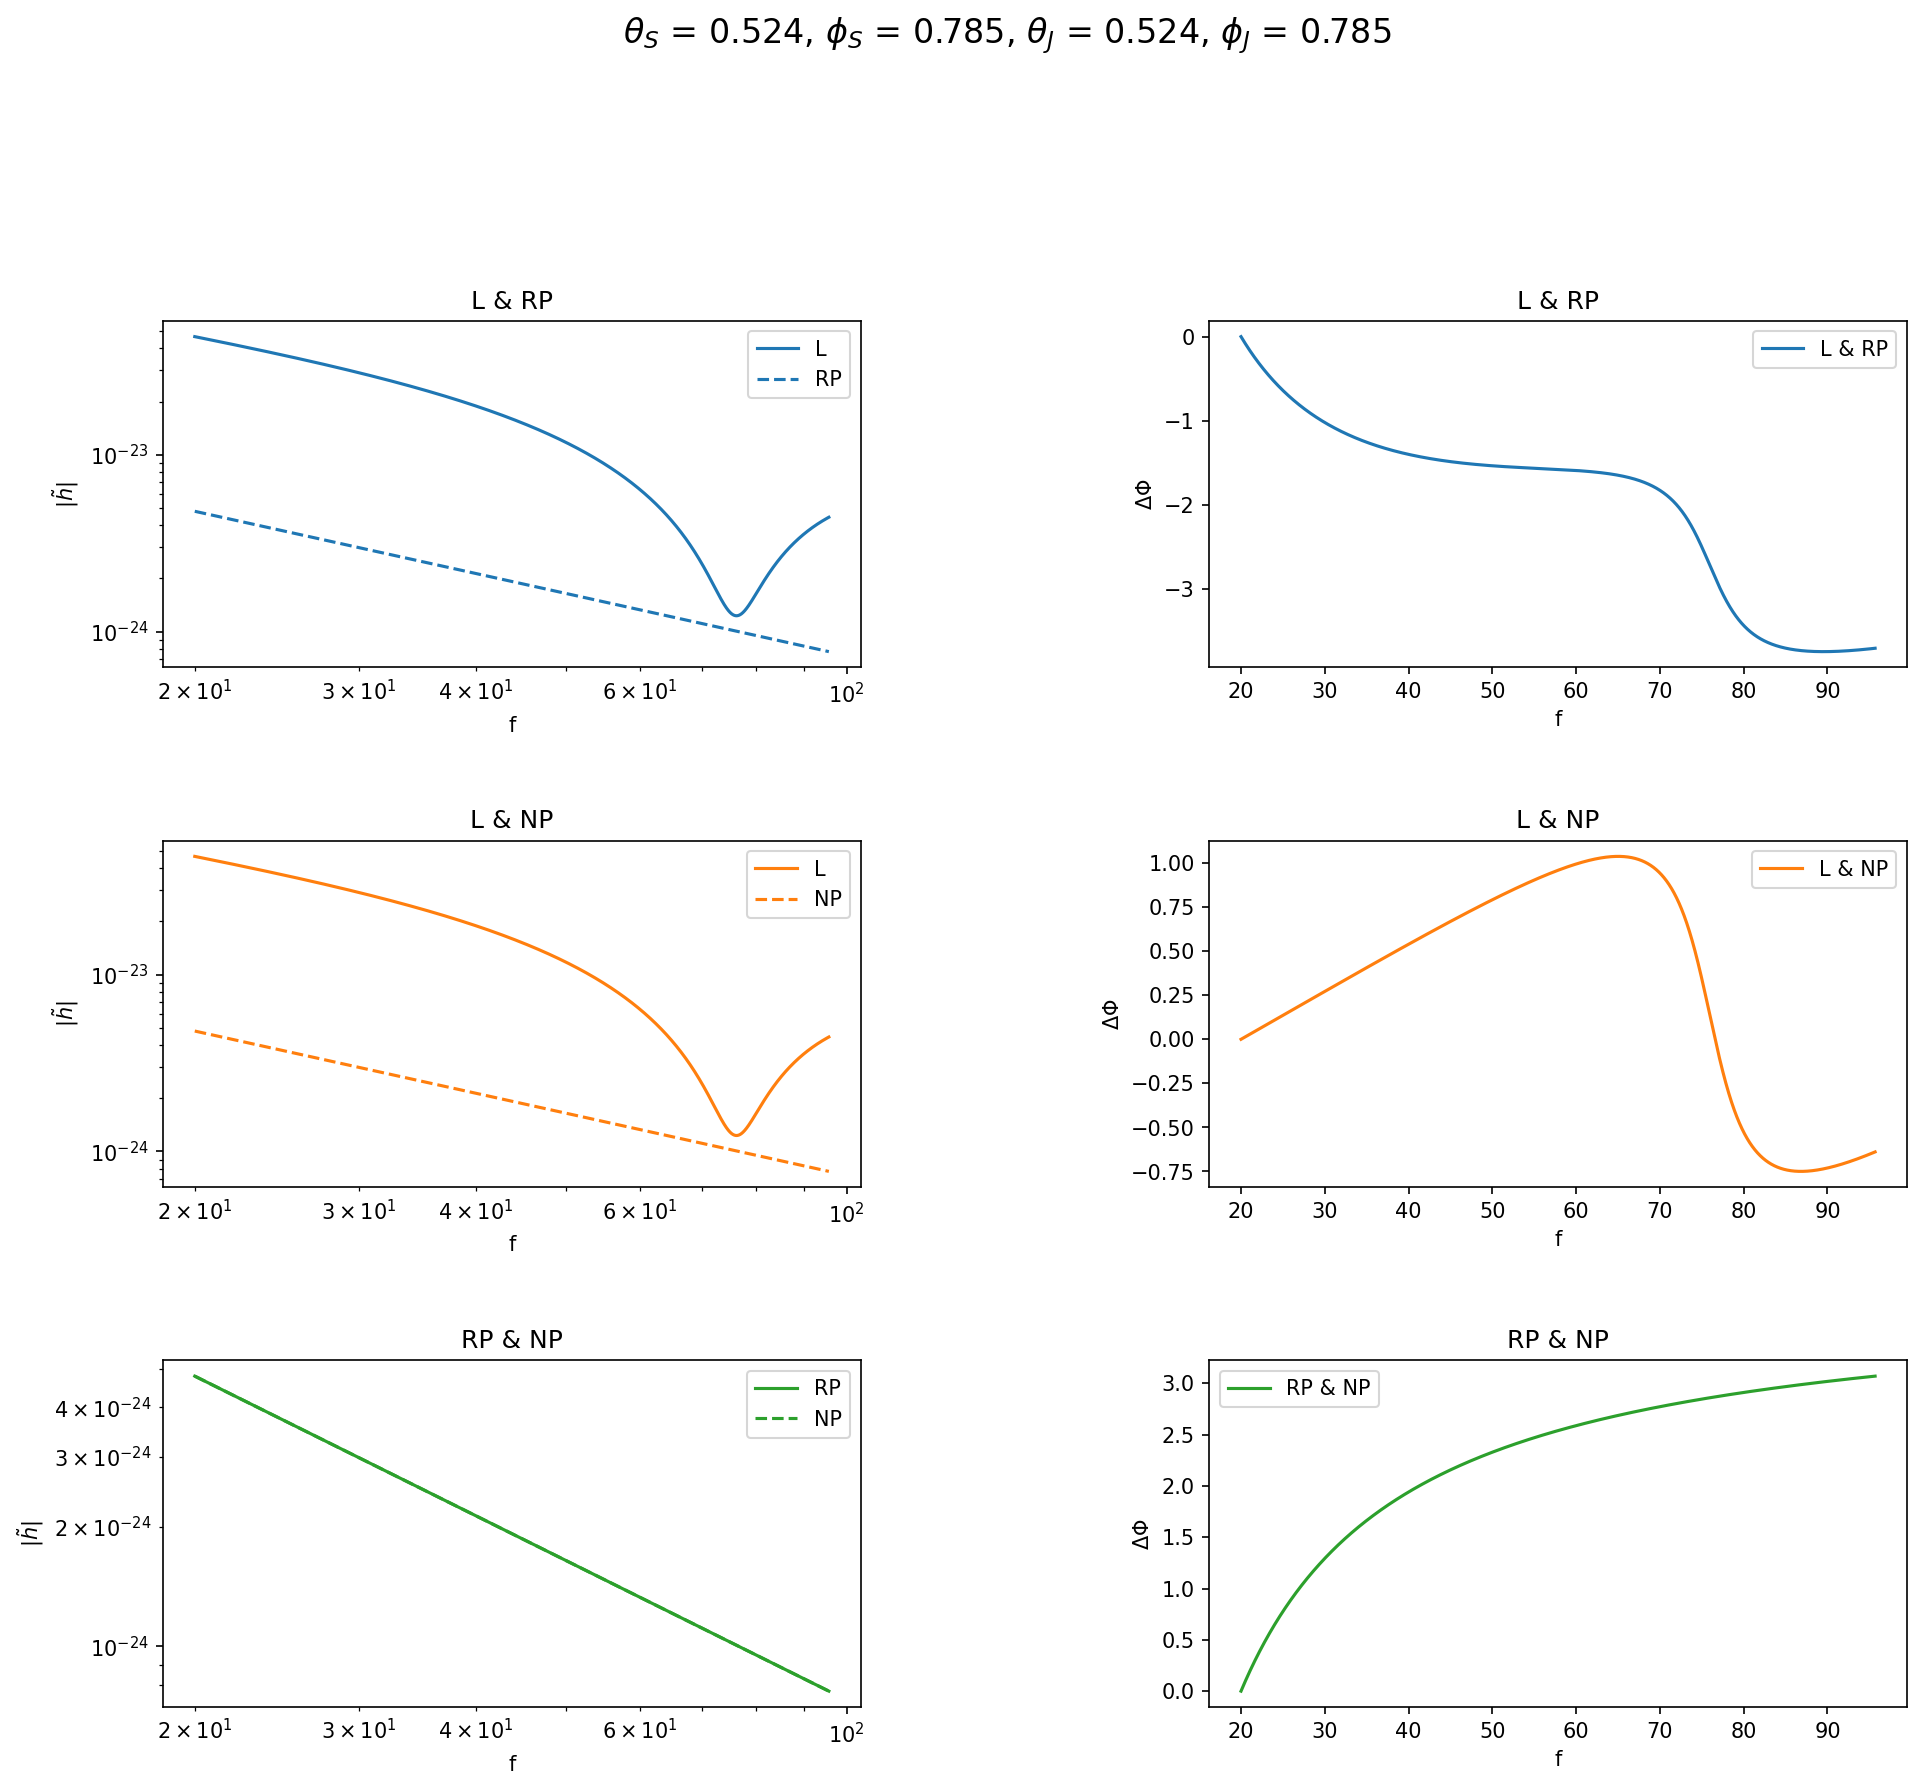

In [11]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["faceon"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.305
RP_params["theta_tilde"] = 0.0
RP_params["gamma_P"] = 0.0

h_phase_diff_pairs()

L & RP {'ep_min': 0.0040482696506976, 'g_min': 0.0, 'ep_max': 0.0040482696506976, 'g_max': 0.0, 'ep_0': 0.0040482696506976}
L & NP {'ep_min': 0.02216961076330315, 'g_min': 0.0, 'ep_max': 0.02216961076330315, 'g_max': 0.0, 'ep_0': 0.02216961076330315}
RP & NP {'ep_min': 0.014813253191376607, 'g_min': 0.0, 'ep_max': 0.014813253191376607, 'g_max': 0.0, 'ep_0': 0.014813253191376607}


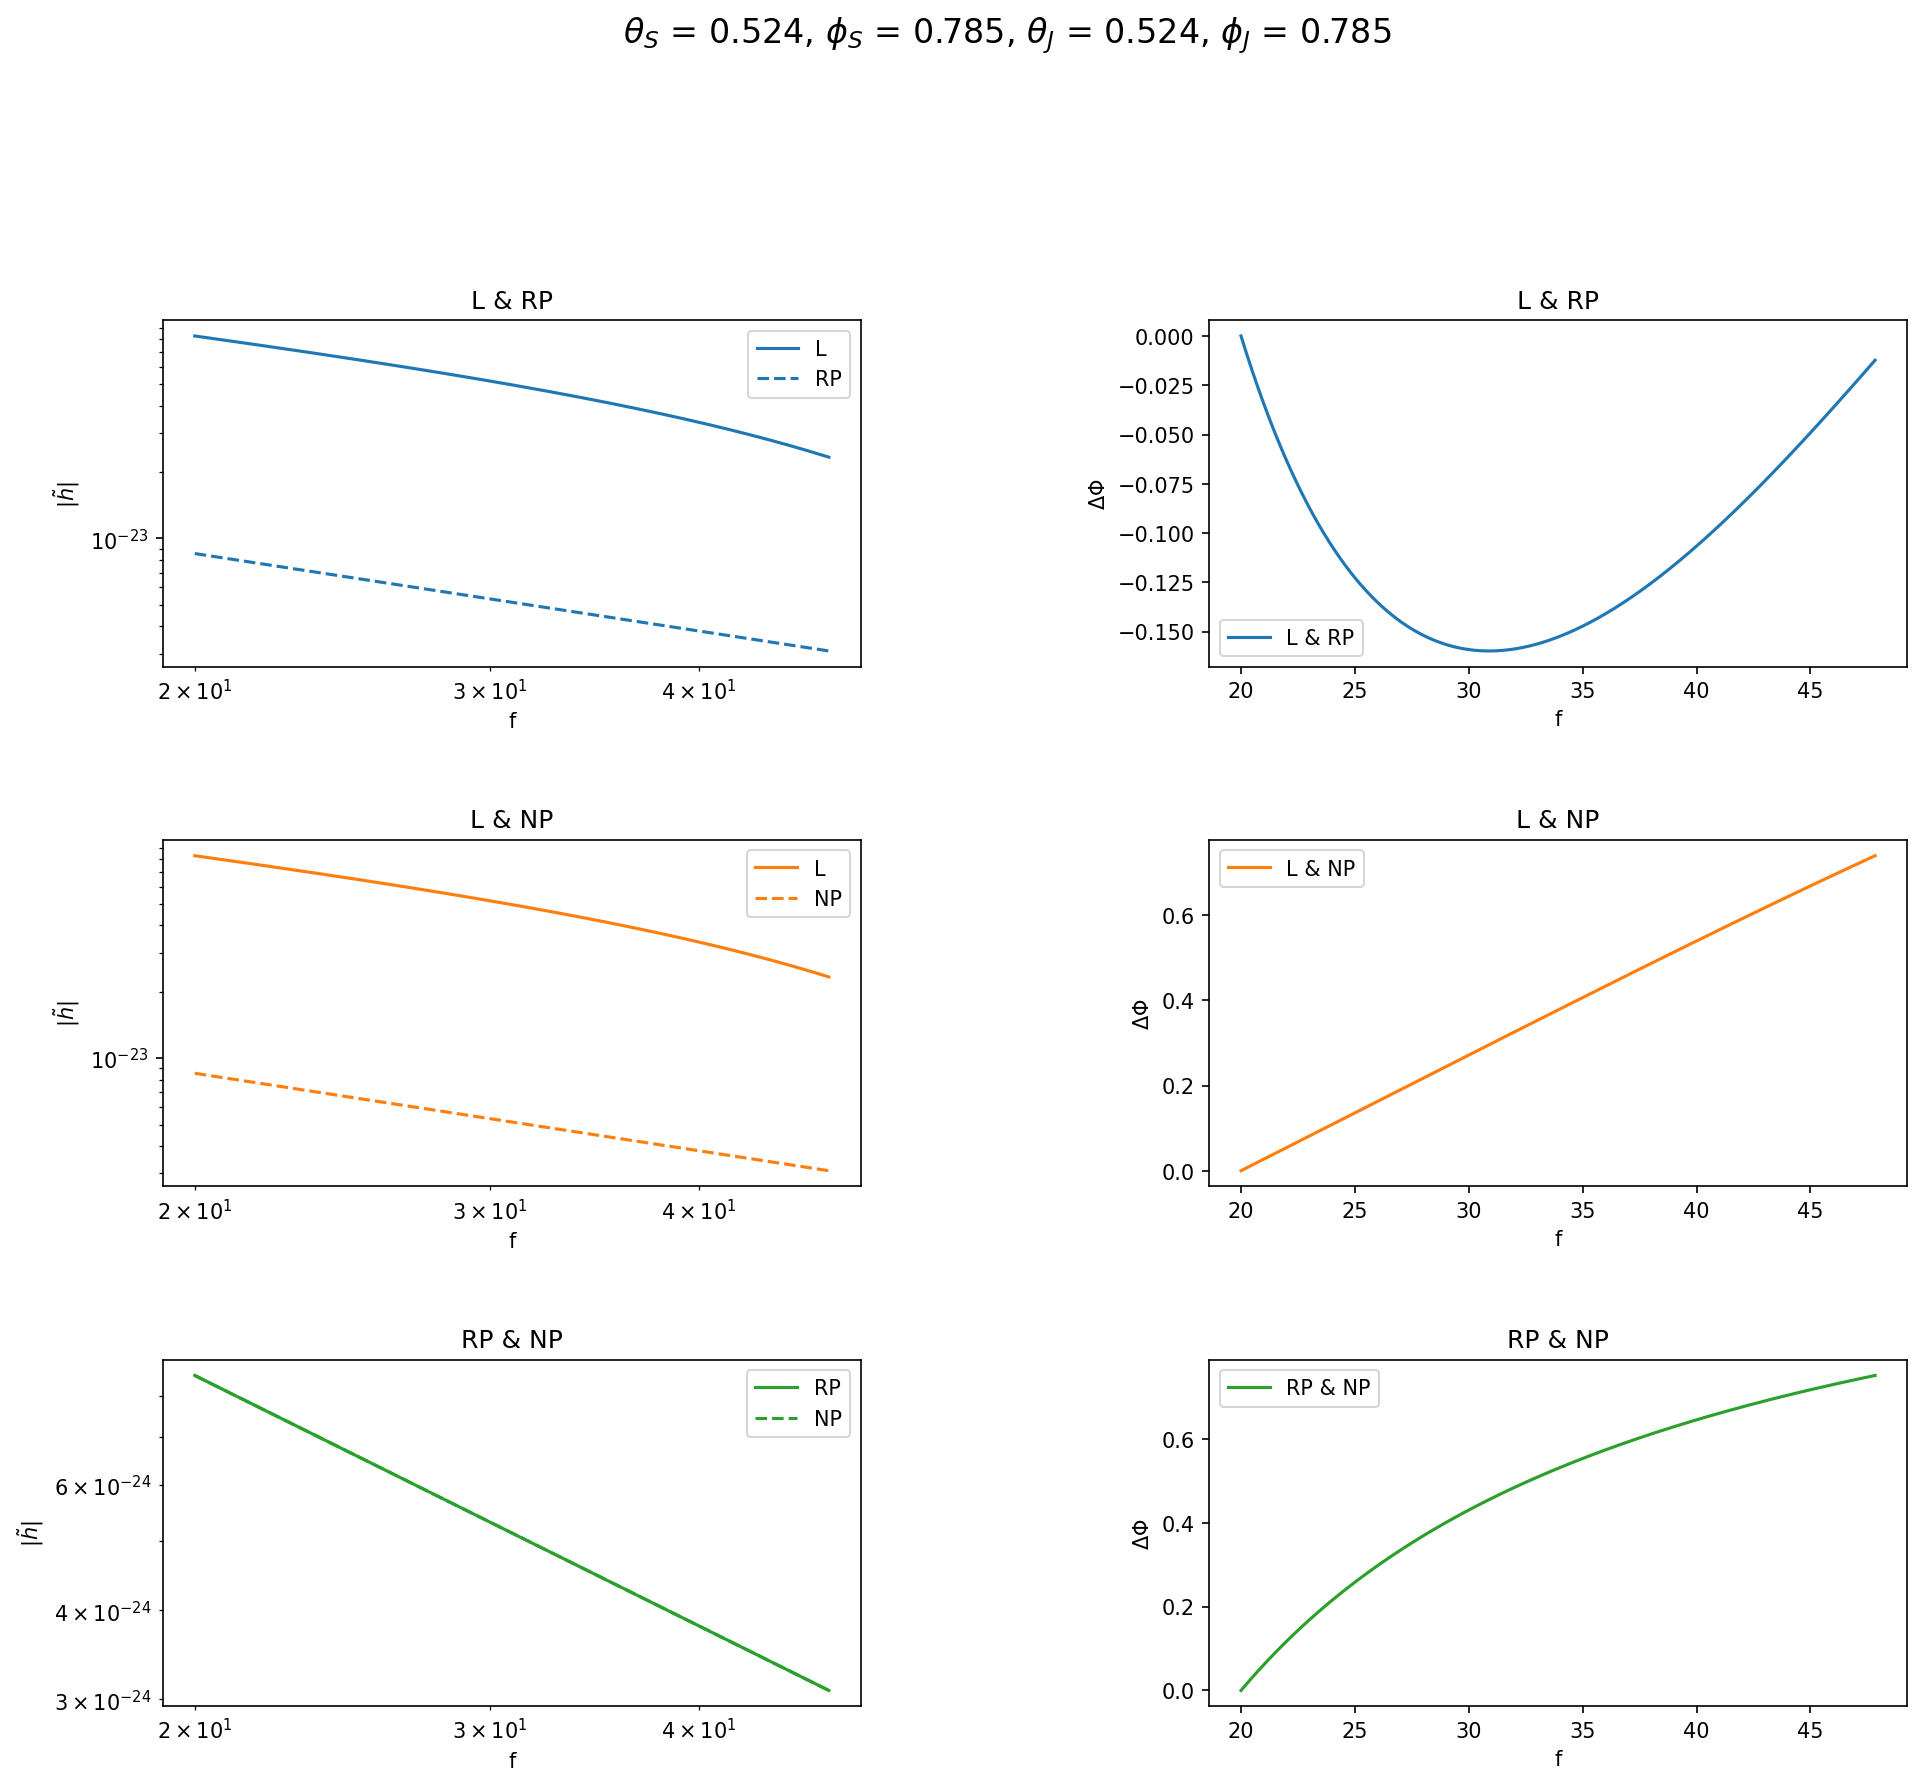

In [12]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["faceon"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.203
RP_params["theta_tilde"] = 0.0
RP_params["gamma_P"] = 0.0

h_phase_diff_pairs()

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:386: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


L & RP {'ep_min': 0.018601605963132095, 'g_min': 3.3002589492256416, 'ep_max': 0.5288788871090611, 'g_max': 5.394654051618837, 'ep_0': 0.39840388310448605}
L & NP {'ep_min': 0.27489738902116945, 'g_min': 0.0, 'ep_max': 0.27489738902116945, 'g_max': 0.0, 'ep_0': 0.27489738902116945}
RP & NP {'ep_min': 0.03750564720519922, 'g_min': 0.6981317007977318, 'ep_max': 0.2822184935694557, 'g_max': 3.42719198573432, 'ep_0': 0.042833024838016986}


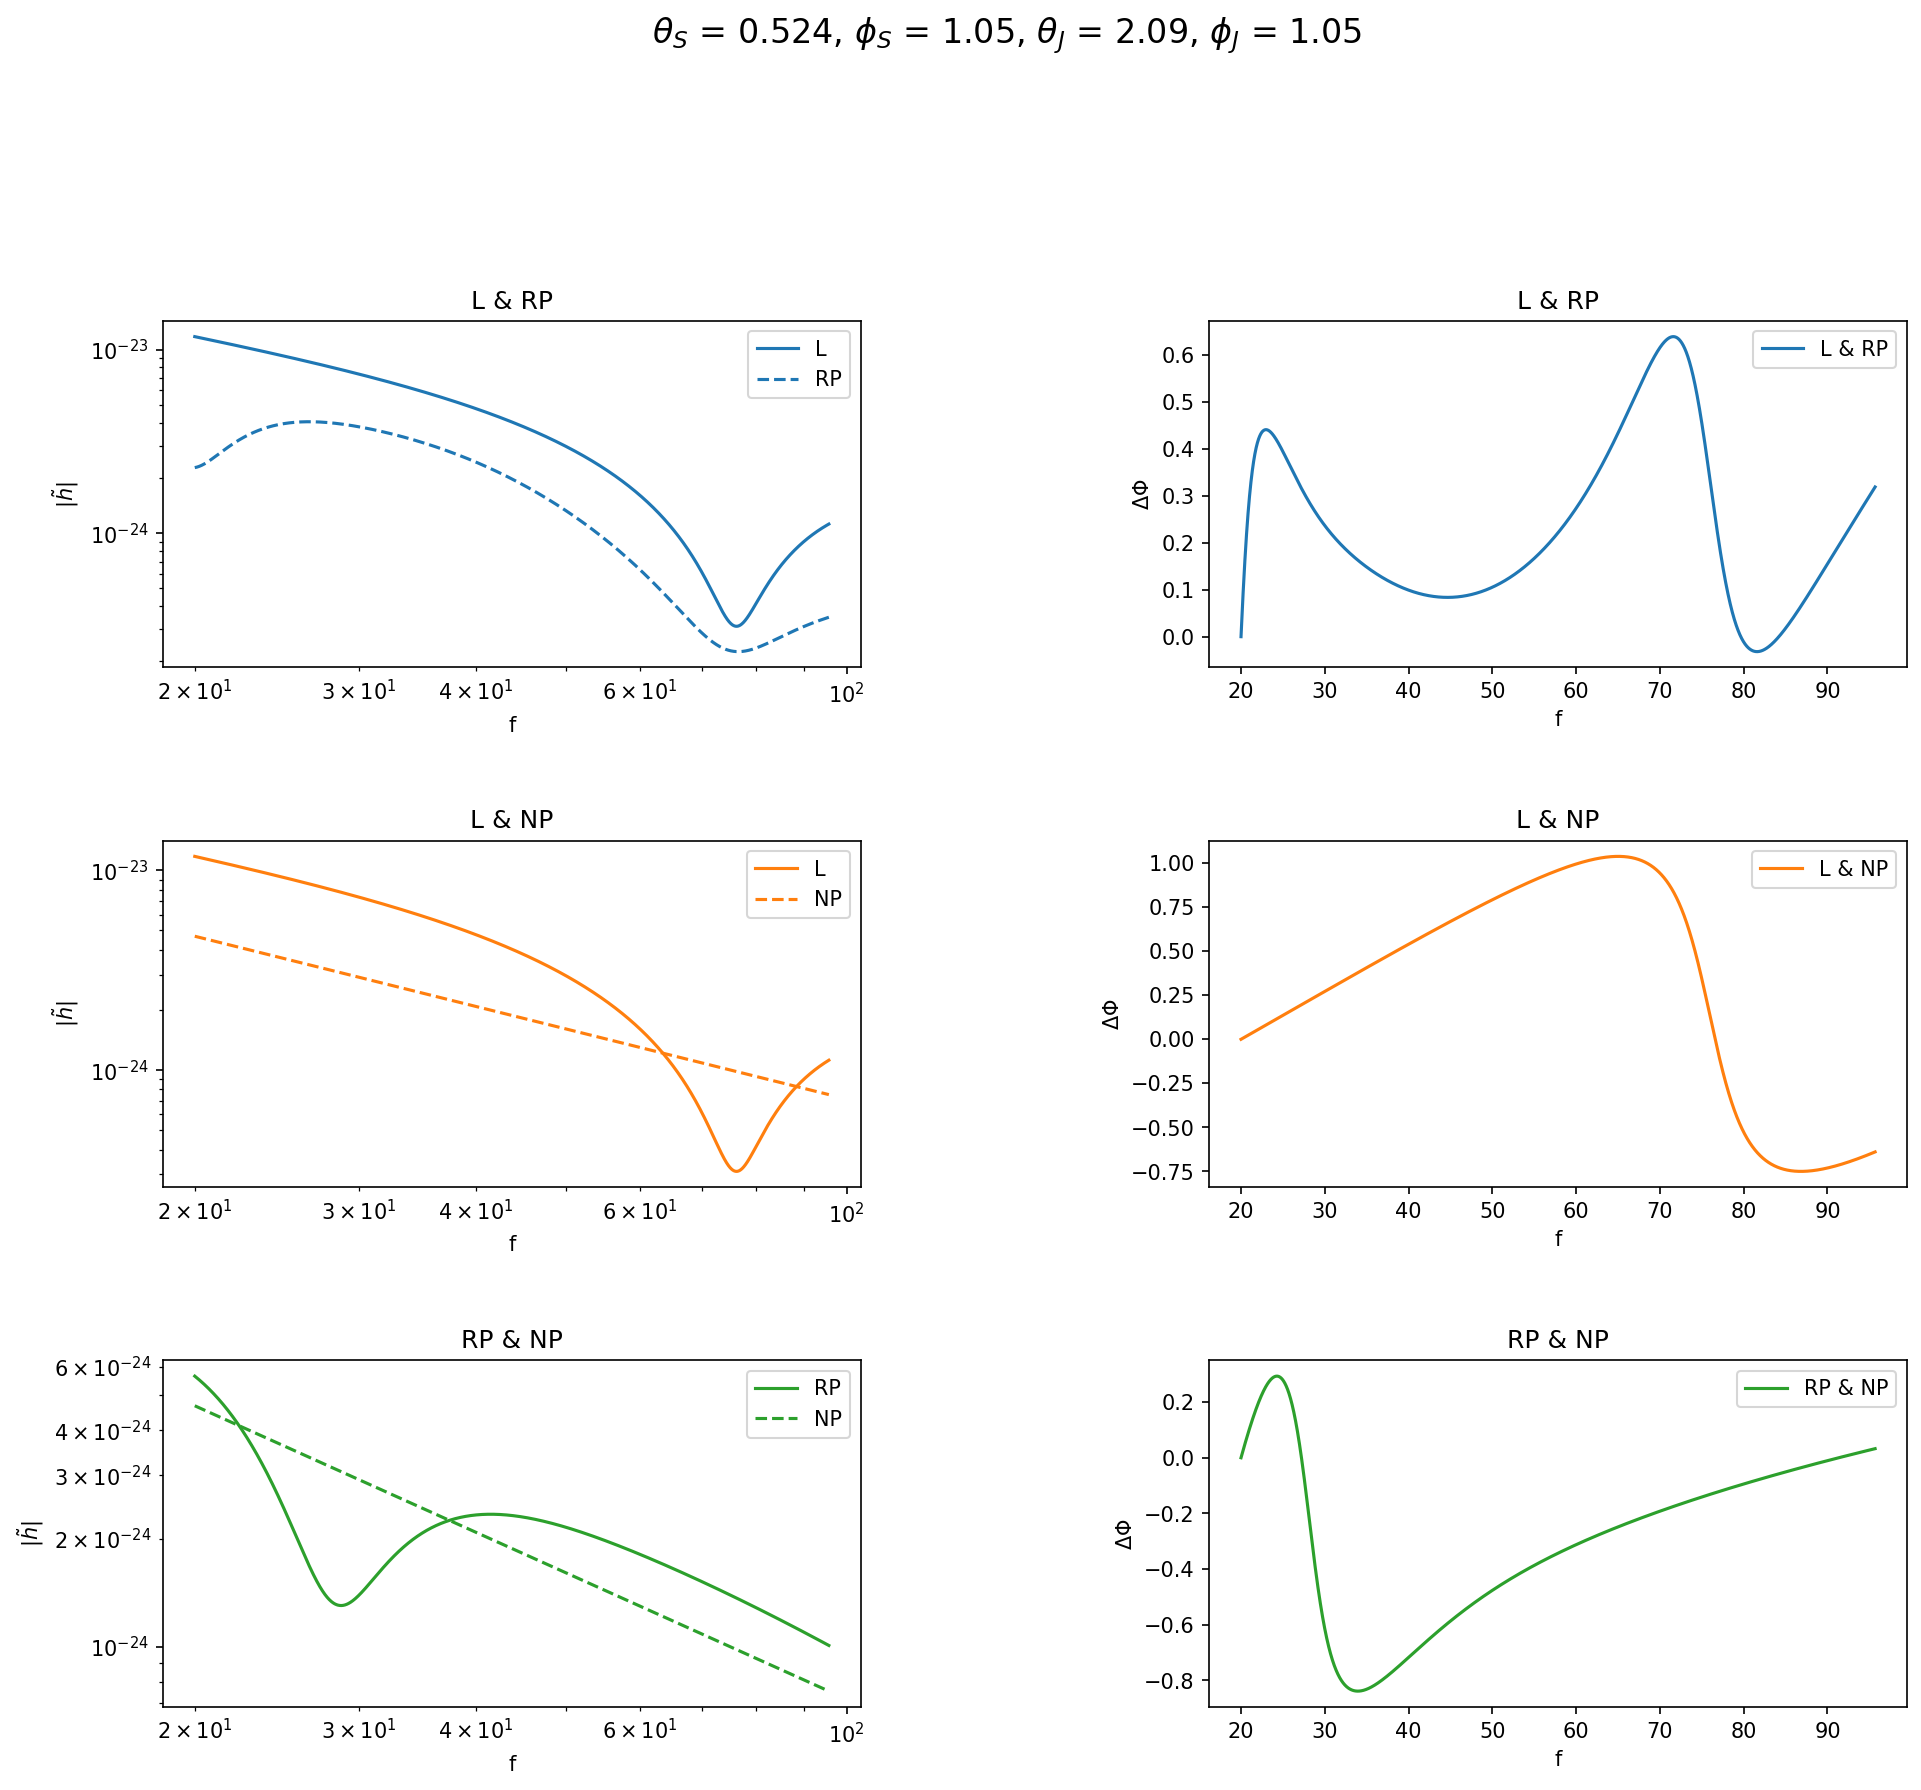

In [13]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.32
RP_params["theta_tilde"] = 2.17
RP_params["gamma_P"] = 3.3

h_phase_diff_pairs()

L & RP {'ep_min': 0.00028198570249315935, 'g_min': 6.092785752416569, 'ep_max': 0.37161576442524613, 'g_max': 1.5231964381041423, 'ep_0': 0.0009824415000118103}
L & NP {'ep_min': 0.02216961076330326, 'g_min': 0.0, 'ep_max': 0.02216961076330326, 'g_max': 0.0, 'ep_0': 0.02216961076330326}
RP & NP {'ep_min': 0.010207552021434863, 'g_min': 5.013854942092801, 'ep_max': 0.428723243481239, 'g_max': 1.4597299198498028, 'ep_0': 0.029030628282265436}


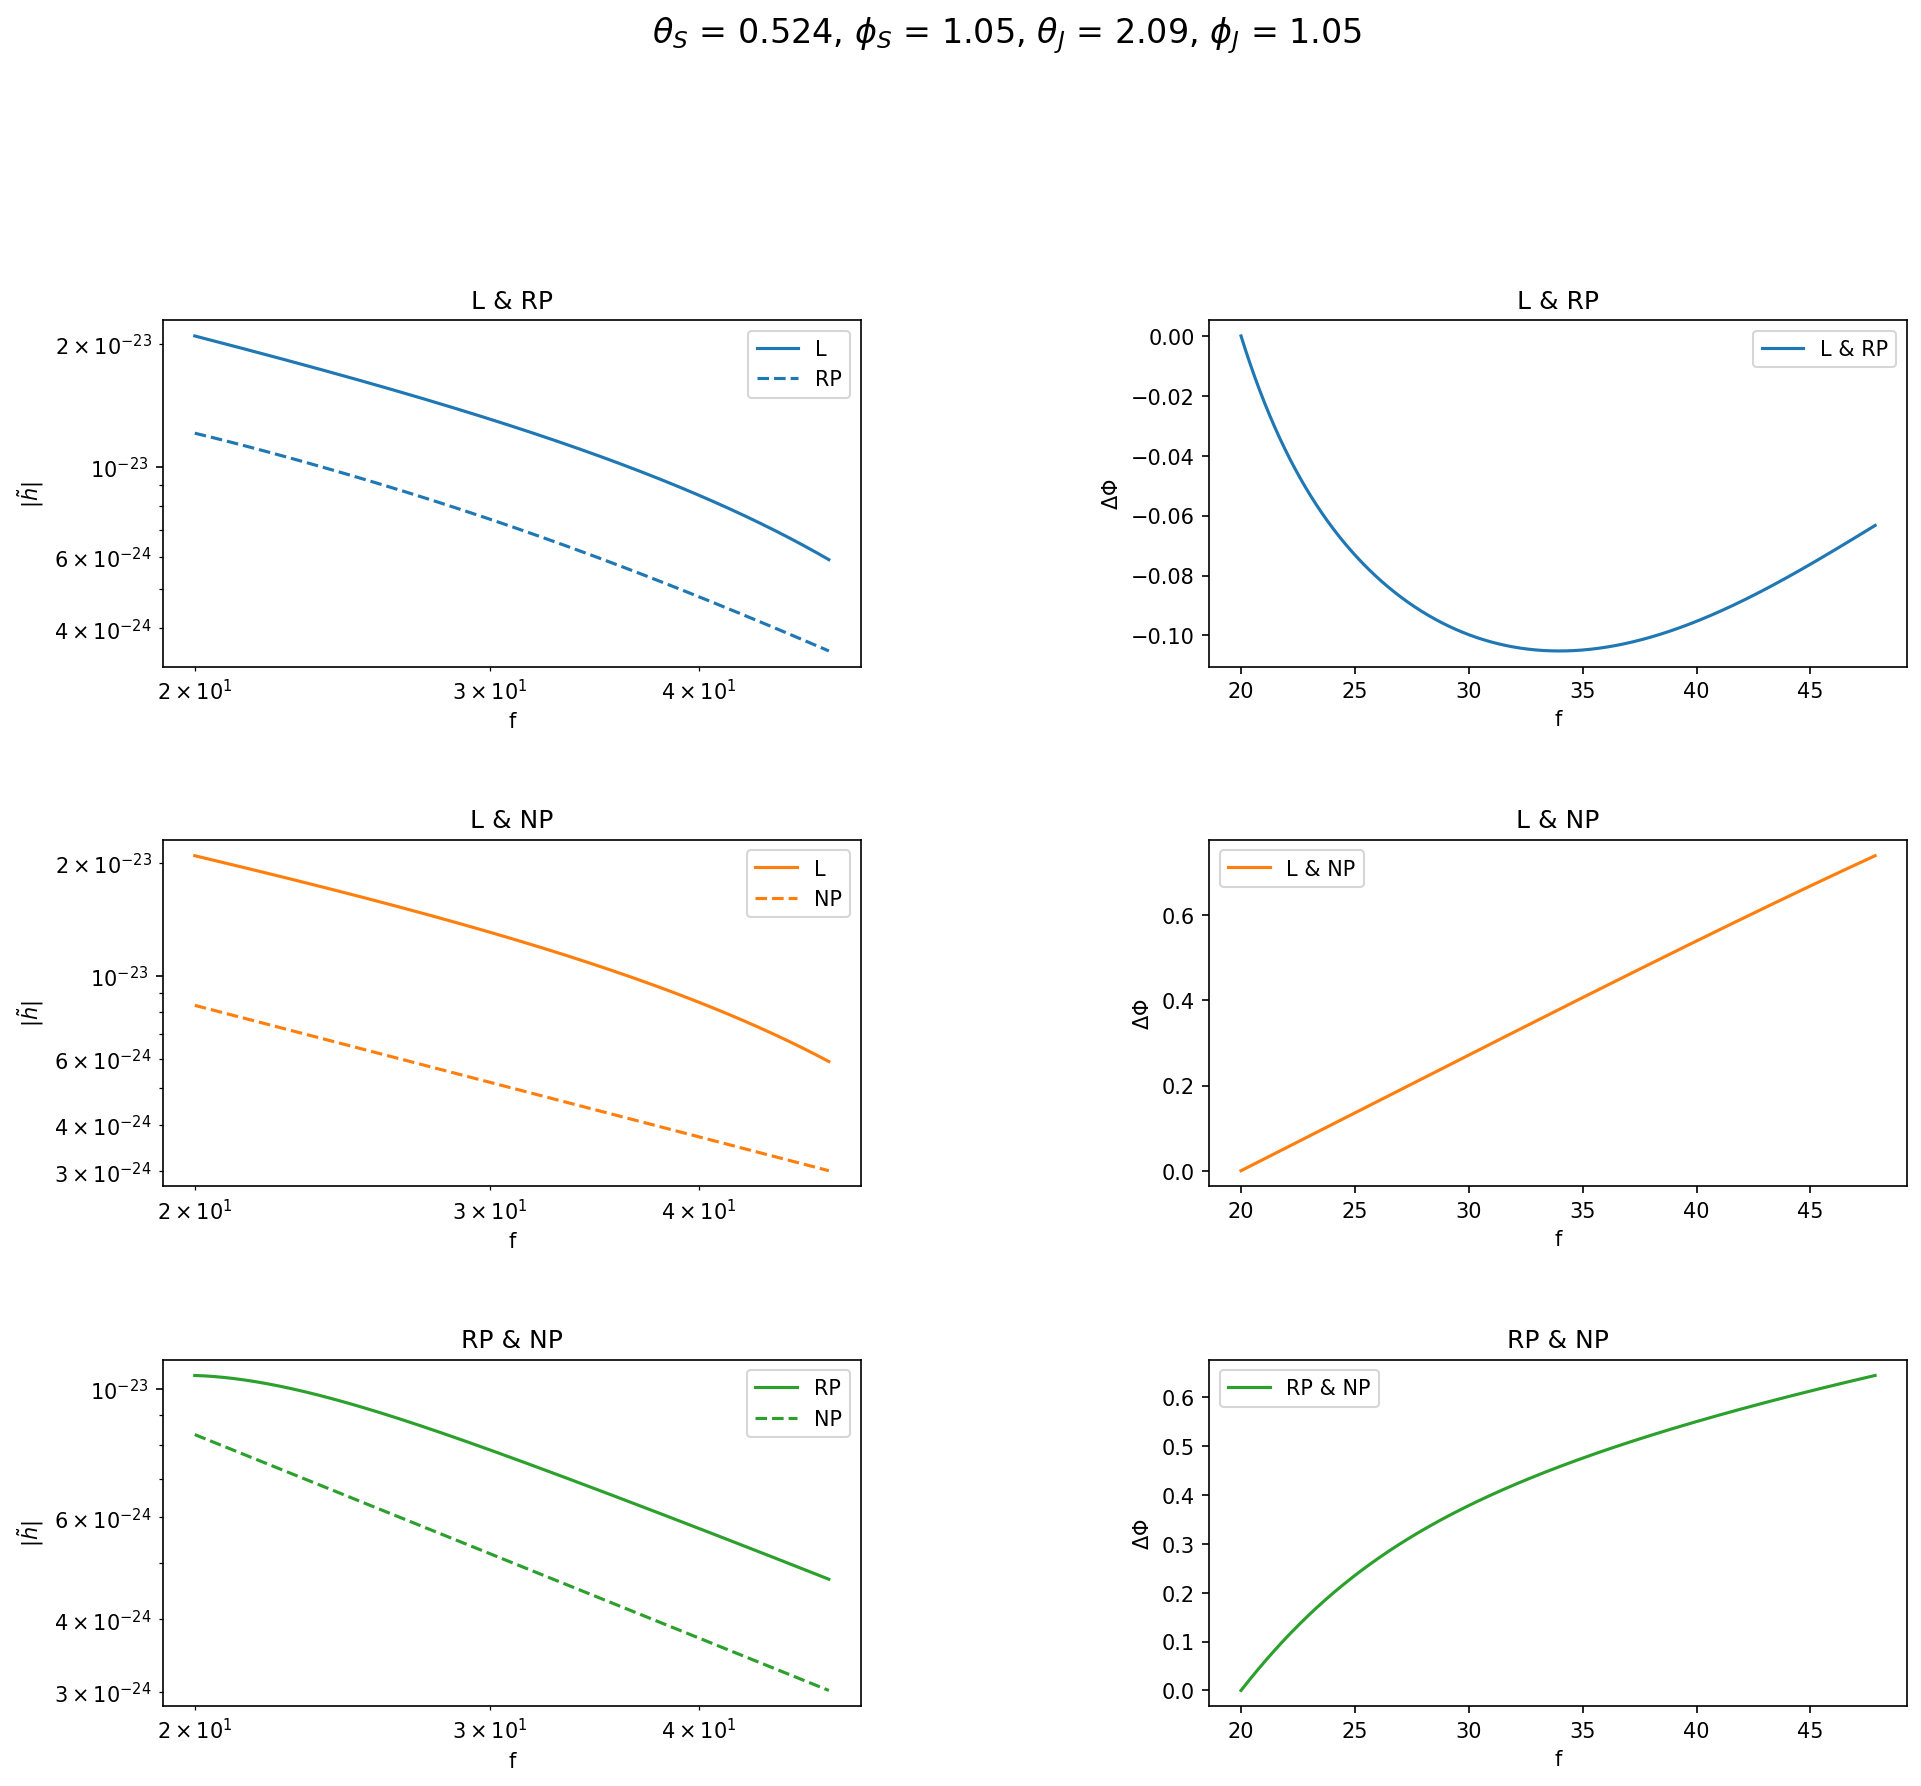

In [14]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.07
RP_params["theta_tilde"] = 2.85
RP_params["gamma_P"] = 6.09

h_phase_diff_pairs()

L & RP {'ep_min': 0.02261292297931594, 'g_min': 4.823455387329783, 'ep_max': 0.49855852393503364, 'g_max': 0.7615982190520711, 'ep_0': 0.4481593873626555}
L & NP {'ep_min': 0.274897389021169, 'g_min': 0.0, 'ep_max': 0.274897389021169, 'g_max': 0.0, 'ep_0': 0.274897389021169}
RP & NP {'ep_min': 0.03481236015938538, 'g_min': 2.3482611754105527, 'ep_max': 0.26233334555363297, 'g_max': 4.950388423838462, 'ep_0': 0.1425780630872251}


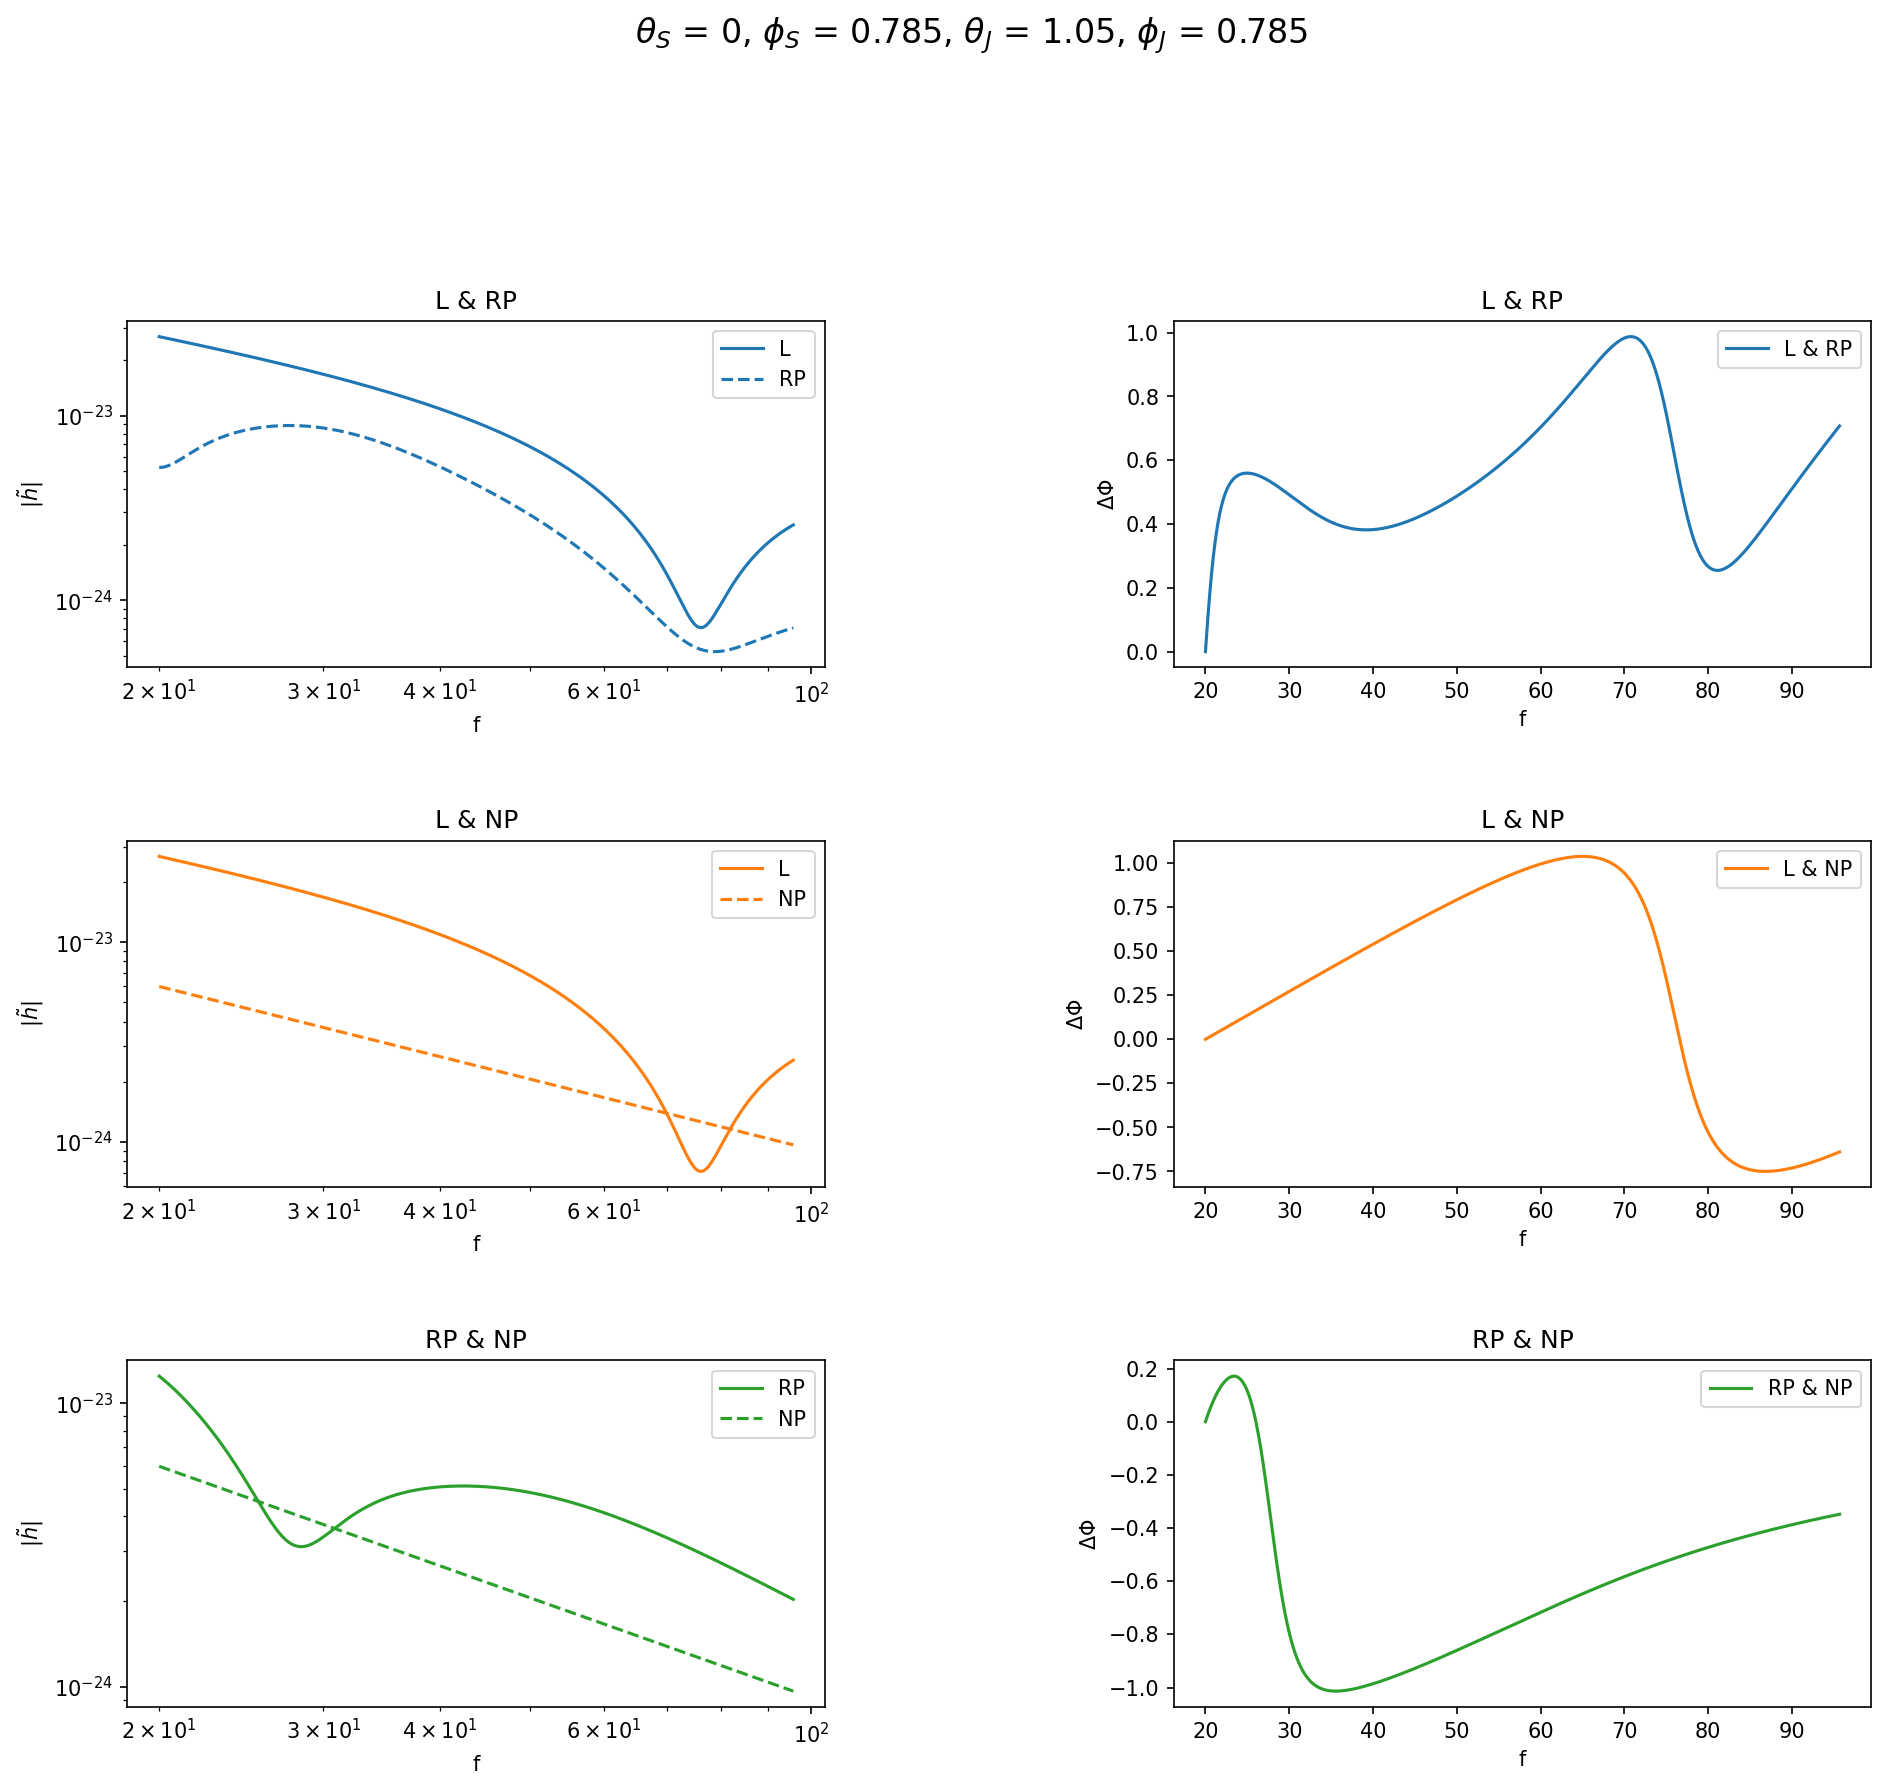

In [15]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["random"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.32
RP_params["theta_tilde"] = 4.2
RP_params["gamma_P"] = 4.82

h_phase_diff_pairs()

L & RP {'ep_min': 0.0003829384831085525, 'g_min': 1.1423973285781066, 'ep_max': 0.16364282354521809, 'g_max': 3.998390650023373, 'ep_0': 0.06411560443803588}
L & NP {'ep_min': 0.022169610763303038, 'g_min': 0.0, 'ep_max': 0.022169610763303038, 'g_max': 0.0, 'ep_0': 0.022169610763303038}
RP & NP {'ep_min': 0.0035385098014732996, 'g_min': 0.3807991095260356, 'ep_max': 0.12751573026101248, 'g_max': 4.188790204786391, 'ep_0': 0.013778744260661502}


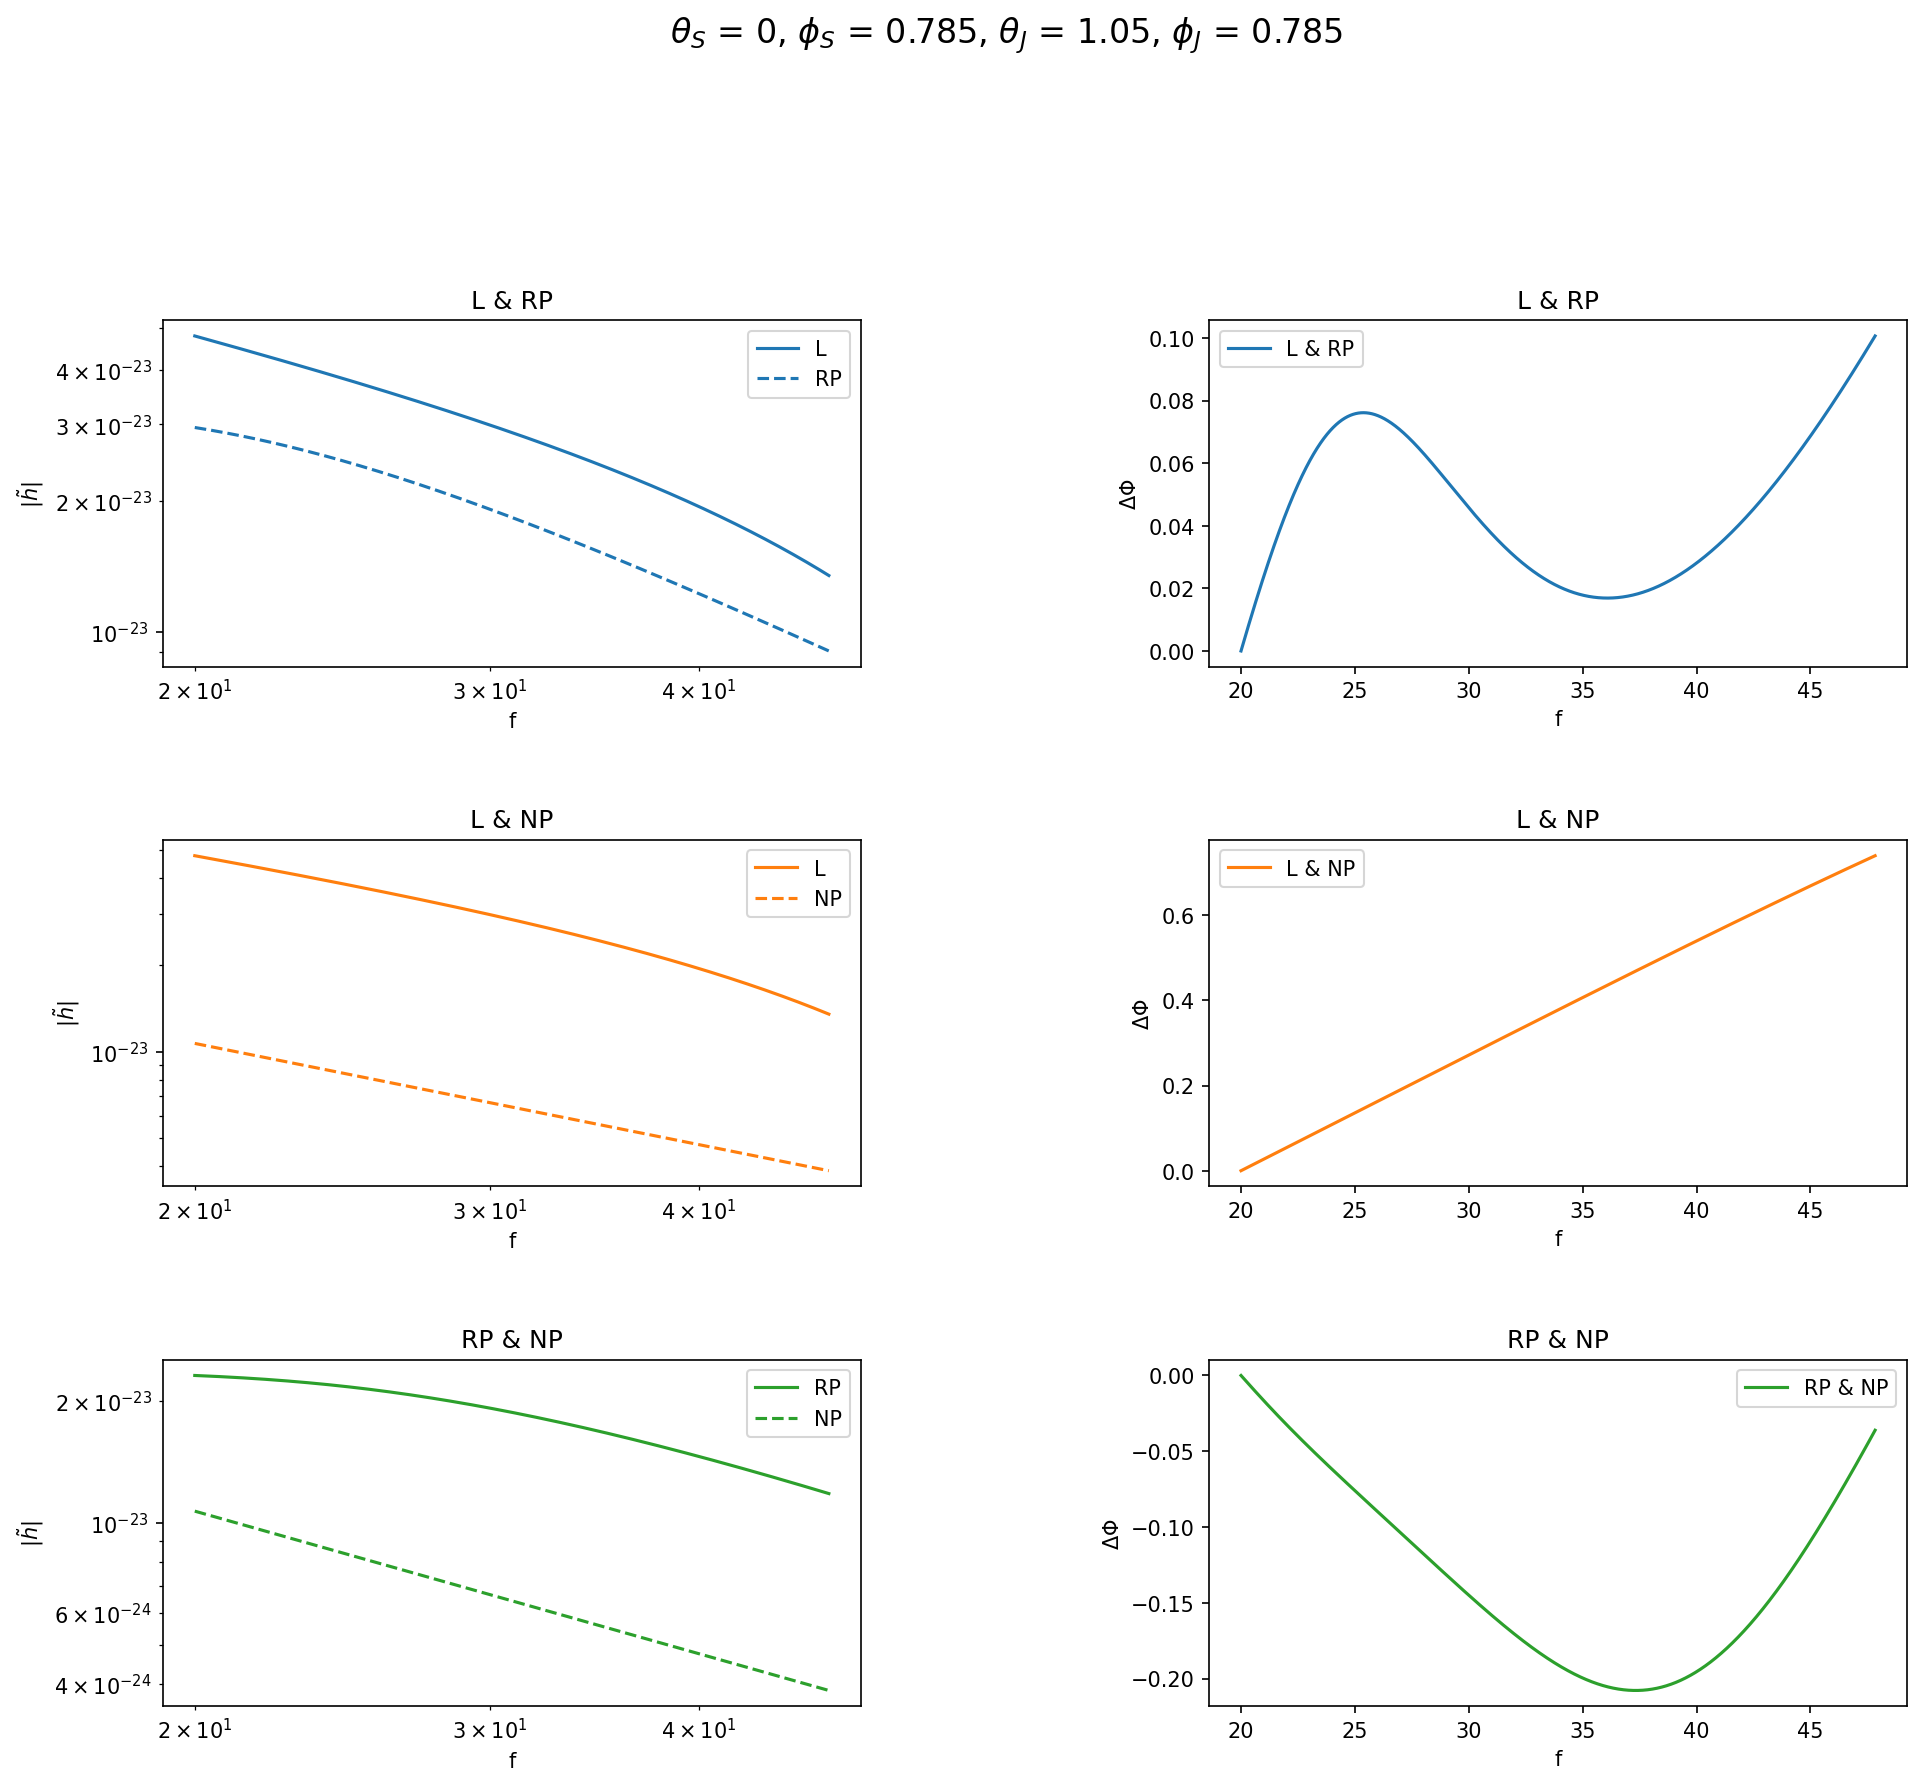

In [16]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["random"], lens_params, RP_params, NP_params
)

# set custom values for mcz and MLz
mcz = 40
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.763
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 1.14

h_phase_diff_pairs()